<h1><center>Travel Package Purchase Prediction Analysis</center></h1>

## Problem Statement

* Tourism is one of the most rapidly growing global industries and tourism forecasting is
becoming an increasingly important activity in planning and managing the industry.
* Because of high fluctuations of tourism demand, accurate predictions of purchase of
travel packages are of high importance for tourism organizations.
* This tourism company, wants to build a viable business model that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector. 

* Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe and King. Looking at the data of the last year, They observed that 18% of the customers purchased the packages.



## Objective:

To harness the available data of existing and potential customers to make the marketing expenditure more efficient and to predict which customer is more likely to purchase the travel package.


<h3>Tasks to Solve :</h3>

- To predict which customer is more likely to purchase the travel package
- Which variables are most significant.
- Which segment of customers should be targeted more.


### Customer details:
1. CustomerID:     Unique customer ID
2. ProdTaken:      Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age:            Age of customer
4. TypeofContact:  How customer was contacted (Company Invited or Self Inquiry)
5. CityTier:       City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. Occupation:     Occupation of customer
7. Gender:         Gender of customer
8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of trips in a year by customer
12. Passport:       The customer has a passport or not (0: No, 1: Yes)
13. OwnCar:         Whether the customers own a car or not (0: No, 1: Yes)
14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15. Designation:    Designation of the customer in the current organization
16. MonthlyIncome:  Gross monthly income of the customer

### Customer interaction data: 
1. PitchSatisfactionScore: Sales pitch satisfaction score
2. ProductPitched: Product pitched by the salesperson
3. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4. DurationOfPitch: Duration of the pitch by a salesperson to the customer

<h1>Required Libraries</h1>

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
# removing the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# setting the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
# load the file using excel. There are two sheets in the excel. Load the Tourism sheet
df = pd.read_csv("/config/workspace/tour_package.csv")

# back up data to preserve the initial version for reference
df_back = df.copy()

### Split the data in Training and Testing Sets

In [3]:
# split the columns in Dependent and Independent Set
X= df.drop(["ProdTaken"],axis=1)
y= df["ProdTaken"]


# splitting data into training and test set, use stratify to maintain the original distribution of Dependent variable as of original set
X_train_all ,X_test, y_train_all, y_test =train_test_split(X,y, test_size=0.15, random_state=25,stratify=y)


# further i will be splitting X_train_all and y_train_all for model validation
# creating a list of column names
feature_names = X_train_all.columns.to_list()

## Understanding the data

### Checking the shape of data

In [4]:
# print the data set information as number of rows and columns
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 4888 rows and 20 columns.


### Check the dataset information

In [5]:
# check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Checking the sample data

In [6]:
# setting the random seed via np.random.seed to get the same random results every time
np.random.seed(1)

# also look at random 10 sample rows
df.sample(n=10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,203080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,202851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,202883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0
1676,201676,0,22.0,Self Enquiry,1,11.0,Salaried,Male,2,1.0,Basic,4.0,Married,2.0,1,4,1,0.0,Executive,17328.0
1140,201140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0


**Observations:**

1. {TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus, Designation}----------
     are object type columns but contain categorical information. NEED TO convert these columns to Category type.
2. {PreferredPropertyStar, NumberOfChildrenVisiting, NumberOfPersonVisiting, PitchSatisfactionScore, NumberOfFollowups, OwnCar, Passport, CityTier and ProdTaken}--------------
     are numerical columns but contain categorical information. NEED TO covert these columns to Category type.

#### Duplicates

In [7]:

print('There are' , df.duplicated().sum() , 'duplicates')
df.loc[df.duplicated(keep=False),:]
df.drop_duplicates(keep='first',inplace=True)
print('There is now' , df.shape[0] , 'rows')
print('There is now' , df.shape[1] , 'columns')

There are 0 duplicates
There is now 4888 rows
There is now 20 columns


## EDA

### Categorical columns

#### having value in string

In [8]:
categorical_df = pd.DataFrame()
for col in df.select_dtypes(include=['object']):
    categorical_df[col] = df[col]

for col in categorical_df:
    print(f'{col :-<50} {df[col].unique()}')

TypeofContact------------------------------------- ['Self Enquiry' 'Company Invited' nan]
Occupation---------------------------------------- ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Gender-------------------------------------------- ['Female' 'Male' 'Fe Male']
ProductPitched------------------------------------ ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
MaritalStatus------------------------------------- ['Single' 'Divorced' 'Married' 'Unmarried']
Designation--------------------------------------- ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']


#### having value in number

In [9]:
num_categorical_df = pd.DataFrame()
numeric_df = pd.DataFrame()
for col in df.select_dtypes(include=['int64', 'float64']):
    if len(df[col].unique()) > 10:
        numeric_df[col] = df[col]
        continue
    num_categorical_df[col] = df[col]

for col in num_categorical_df:
    if len(df[col].unique()) >10:
        
        continue
    print(f'{col :-<40} {df[col].unique()}')

ProdTaken------------------------------- [1 0]
CityTier-------------------------------- [3 1 2]
NumberOfPersonVisiting------------------ [3 2 1 4 5]
NumberOfFollowups----------------------- [ 3.  4.  2.  5. nan  1.  6.]
PreferredPropertyStar------------------- [ 3.  4.  5. nan]
Passport-------------------------------- [1 0]
PitchSatisfactionScore------------------ [2 3 5 4 1]
OwnCar---------------------------------- [1 0]
NumberOfChildrenVisiting---------------- [ 0.  2.  1. nan  3.]


In [10]:
num_categorical_df.columns

Index(['ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting'],
      dtype='object')

In [11]:
categorical_df.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

## numerical columns

In [12]:
numeric_df.columns

Index(['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfTrips',
       'MonthlyIncome'],
      dtype='object')

In [13]:
numeric_df

,CustomerID,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
0,200000,41.0,6.0,1.0,20993.0
1,200001,49.0,14.0,2.0,20130.0
2,200002,37.0,8.0,7.0,17090.0
3,200003,33.0,9.0,2.0,17909.0
4,200004,NaN,8.0,1.0,18468.0
...,...,...,...,...,...
4883,204883,49.0,9.0,2.0,26576.0
4884,204884,28.0,31.0,3.0,21212.0
4885,204885,52.0,17.0,7.0,31820.0
4886,204886,19.0,16.0,3.0,20289.0


### Analysing freatures and target

#### Dropped CustomerID

In [14]:
data = df.copy()
target = pd.DataFrame()
target['ProdTaken'] = data['ProdTaken'].map({0:'Not Taken',1:'Taken'})
data = data.drop(['CustomerID','ProdTaken'],axis=1)
data.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


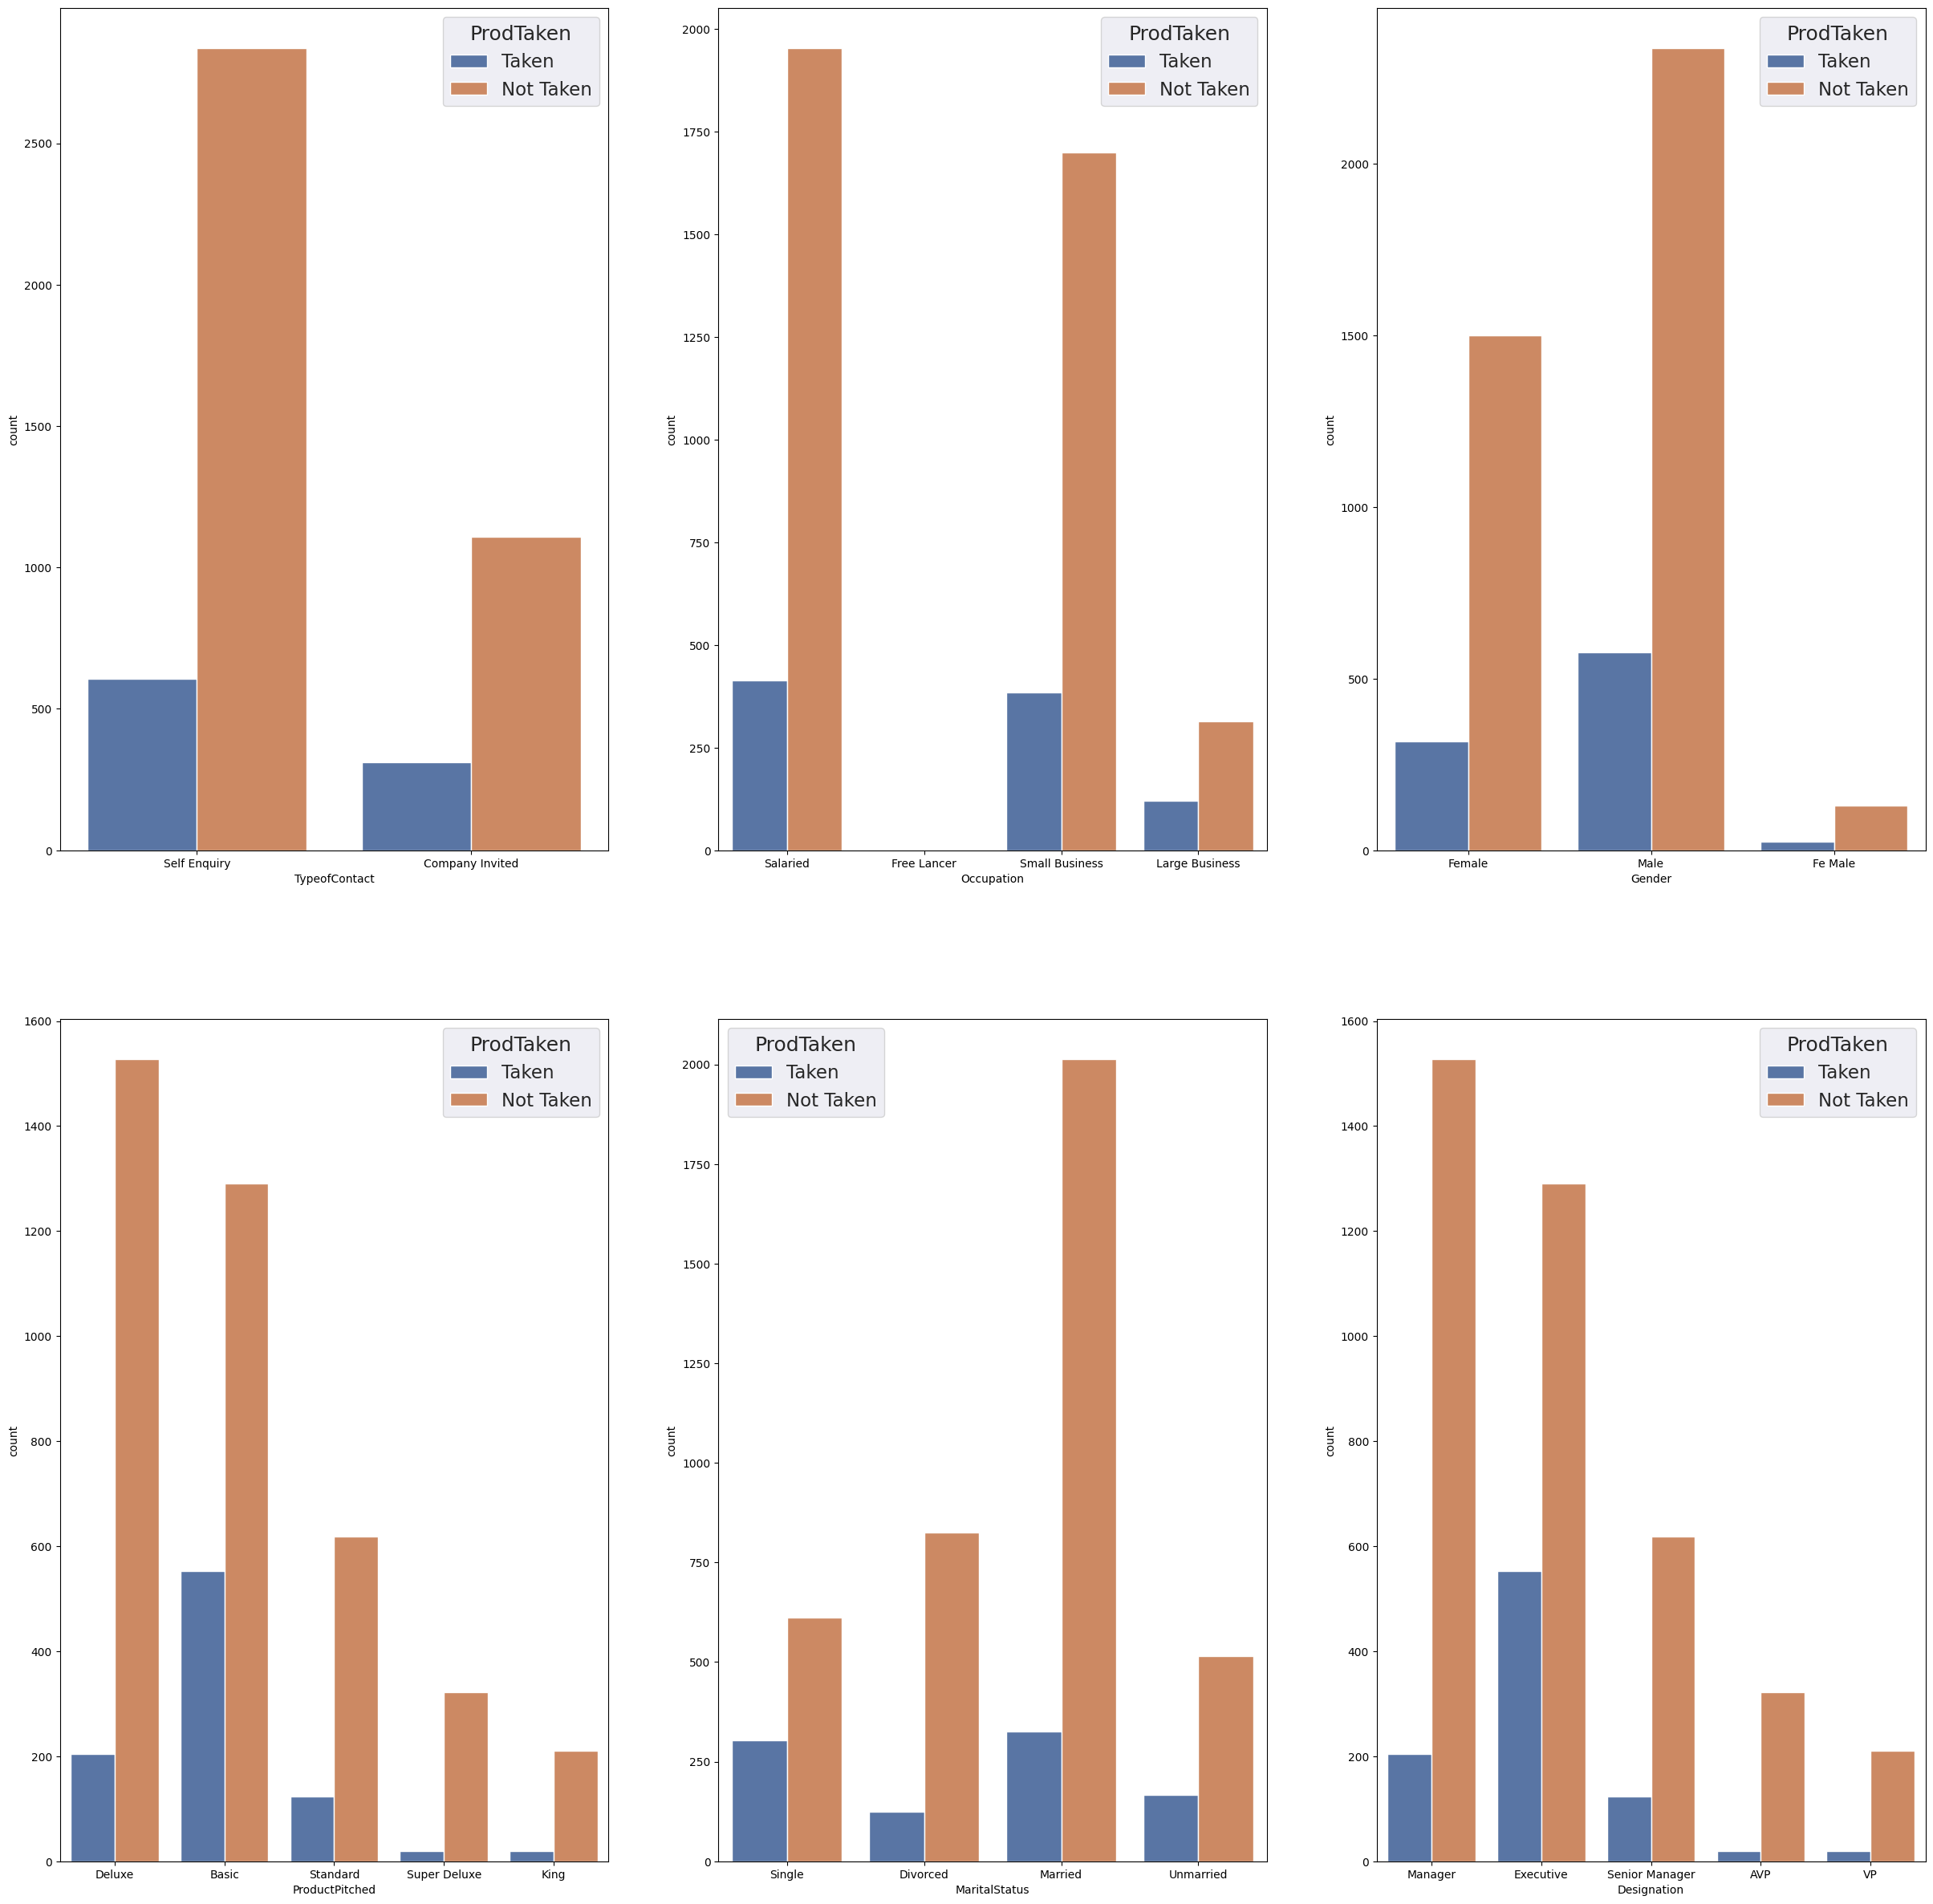

In [15]:
fig, ax = plt.subplots(2,3, figsize=(30, 30))
i=0
sns.set(font_scale = 1.5)
for col in categorical_df: 
    sns.countplot(x=categorical_df[col], hue=target['ProdTaken'], ax=ax[i//3][i%3])
    i=i+1
plt.show()

### Observations:

1. TypeofContact -- Self Enquired customers are more but many of them not taken any package from company
2. Customers having salary and who does small business comes to the company for enquiry.
3. Gender have no issue
4. Deluxe, Basic and Standard packages are enquired more by customers than other and also purchased more than other packages
5. Diff between single and unmarried is that unmarried person will come with his/her partner, comparitively married customers came in more number but successfully purchased customers (marrried) are less
6. Mostly customers having designation as {Manager, Executive or Senior Manager} purchases packages more


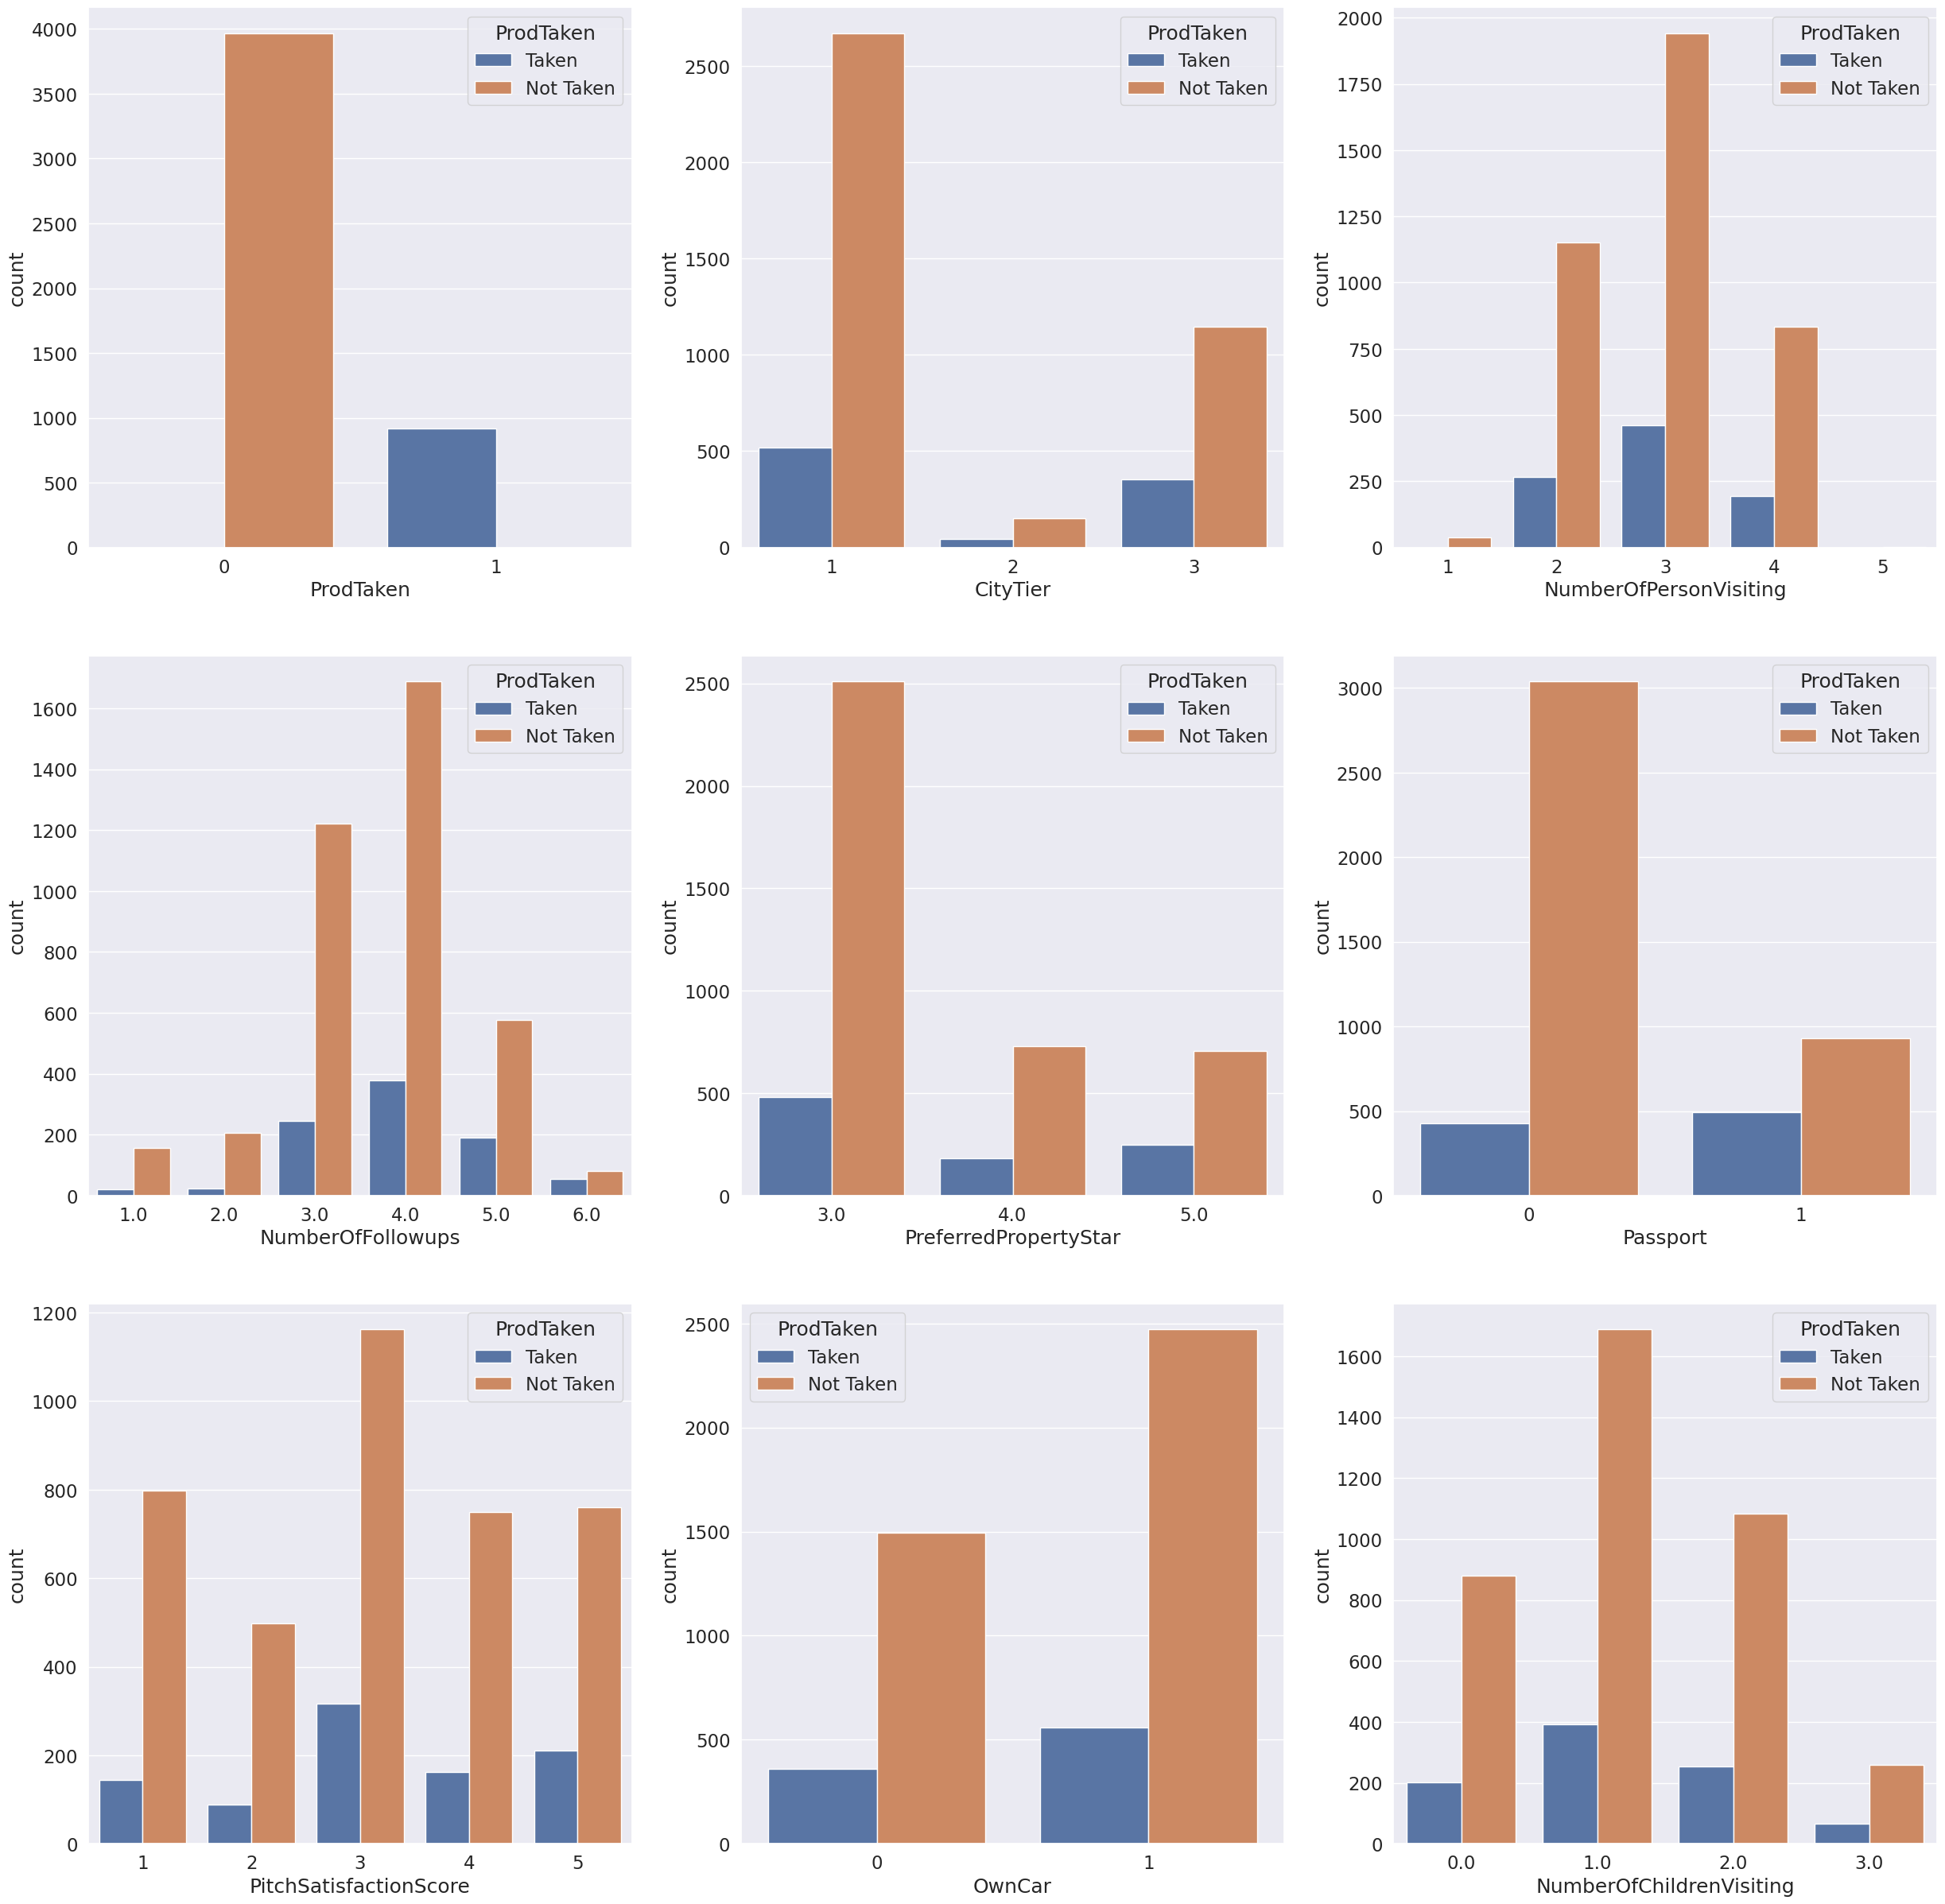

In [16]:
fig, ax = plt.subplots(3,3, figsize=(30, 30))
i=0
sns.set(font_scale = 1.5)
for col in num_categorical_df: 
    sns.countplot(x=num_categorical_df[col], hue=target['ProdTaken'], ax=ax[i//3][i%3])
    i=i+1
plt.show()

## Obesrvation

1. City Tier == 1 and 3 getting lot of customers from this city, Found that Tier 2 cities customers are not viewing any packages
2. followups more than 3 and less than 6 if done then customer is more likely to purchase package
3. requestion Hotel star == 3* customers are more 
4. need to imporve pitch skills since a lot of custmers are rejecting packages after Pitch
5. Custmers having less than 2 child are visiting more to see package



In [17]:
numeric_df

,CustomerID,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
0,200000,41.0,6.0,1.0,20993.0
1,200001,49.0,14.0,2.0,20130.0
2,200002,37.0,8.0,7.0,17090.0
3,200003,33.0,9.0,2.0,17909.0
4,200004,NaN,8.0,1.0,18468.0
...,...,...,...,...,...
4883,204883,49.0,9.0,2.0,26576.0
4884,204884,28.0,31.0,3.0,21212.0
4885,204885,52.0,17.0,7.0,31820.0
4886,204886,19.0,16.0,3.0,20289.0


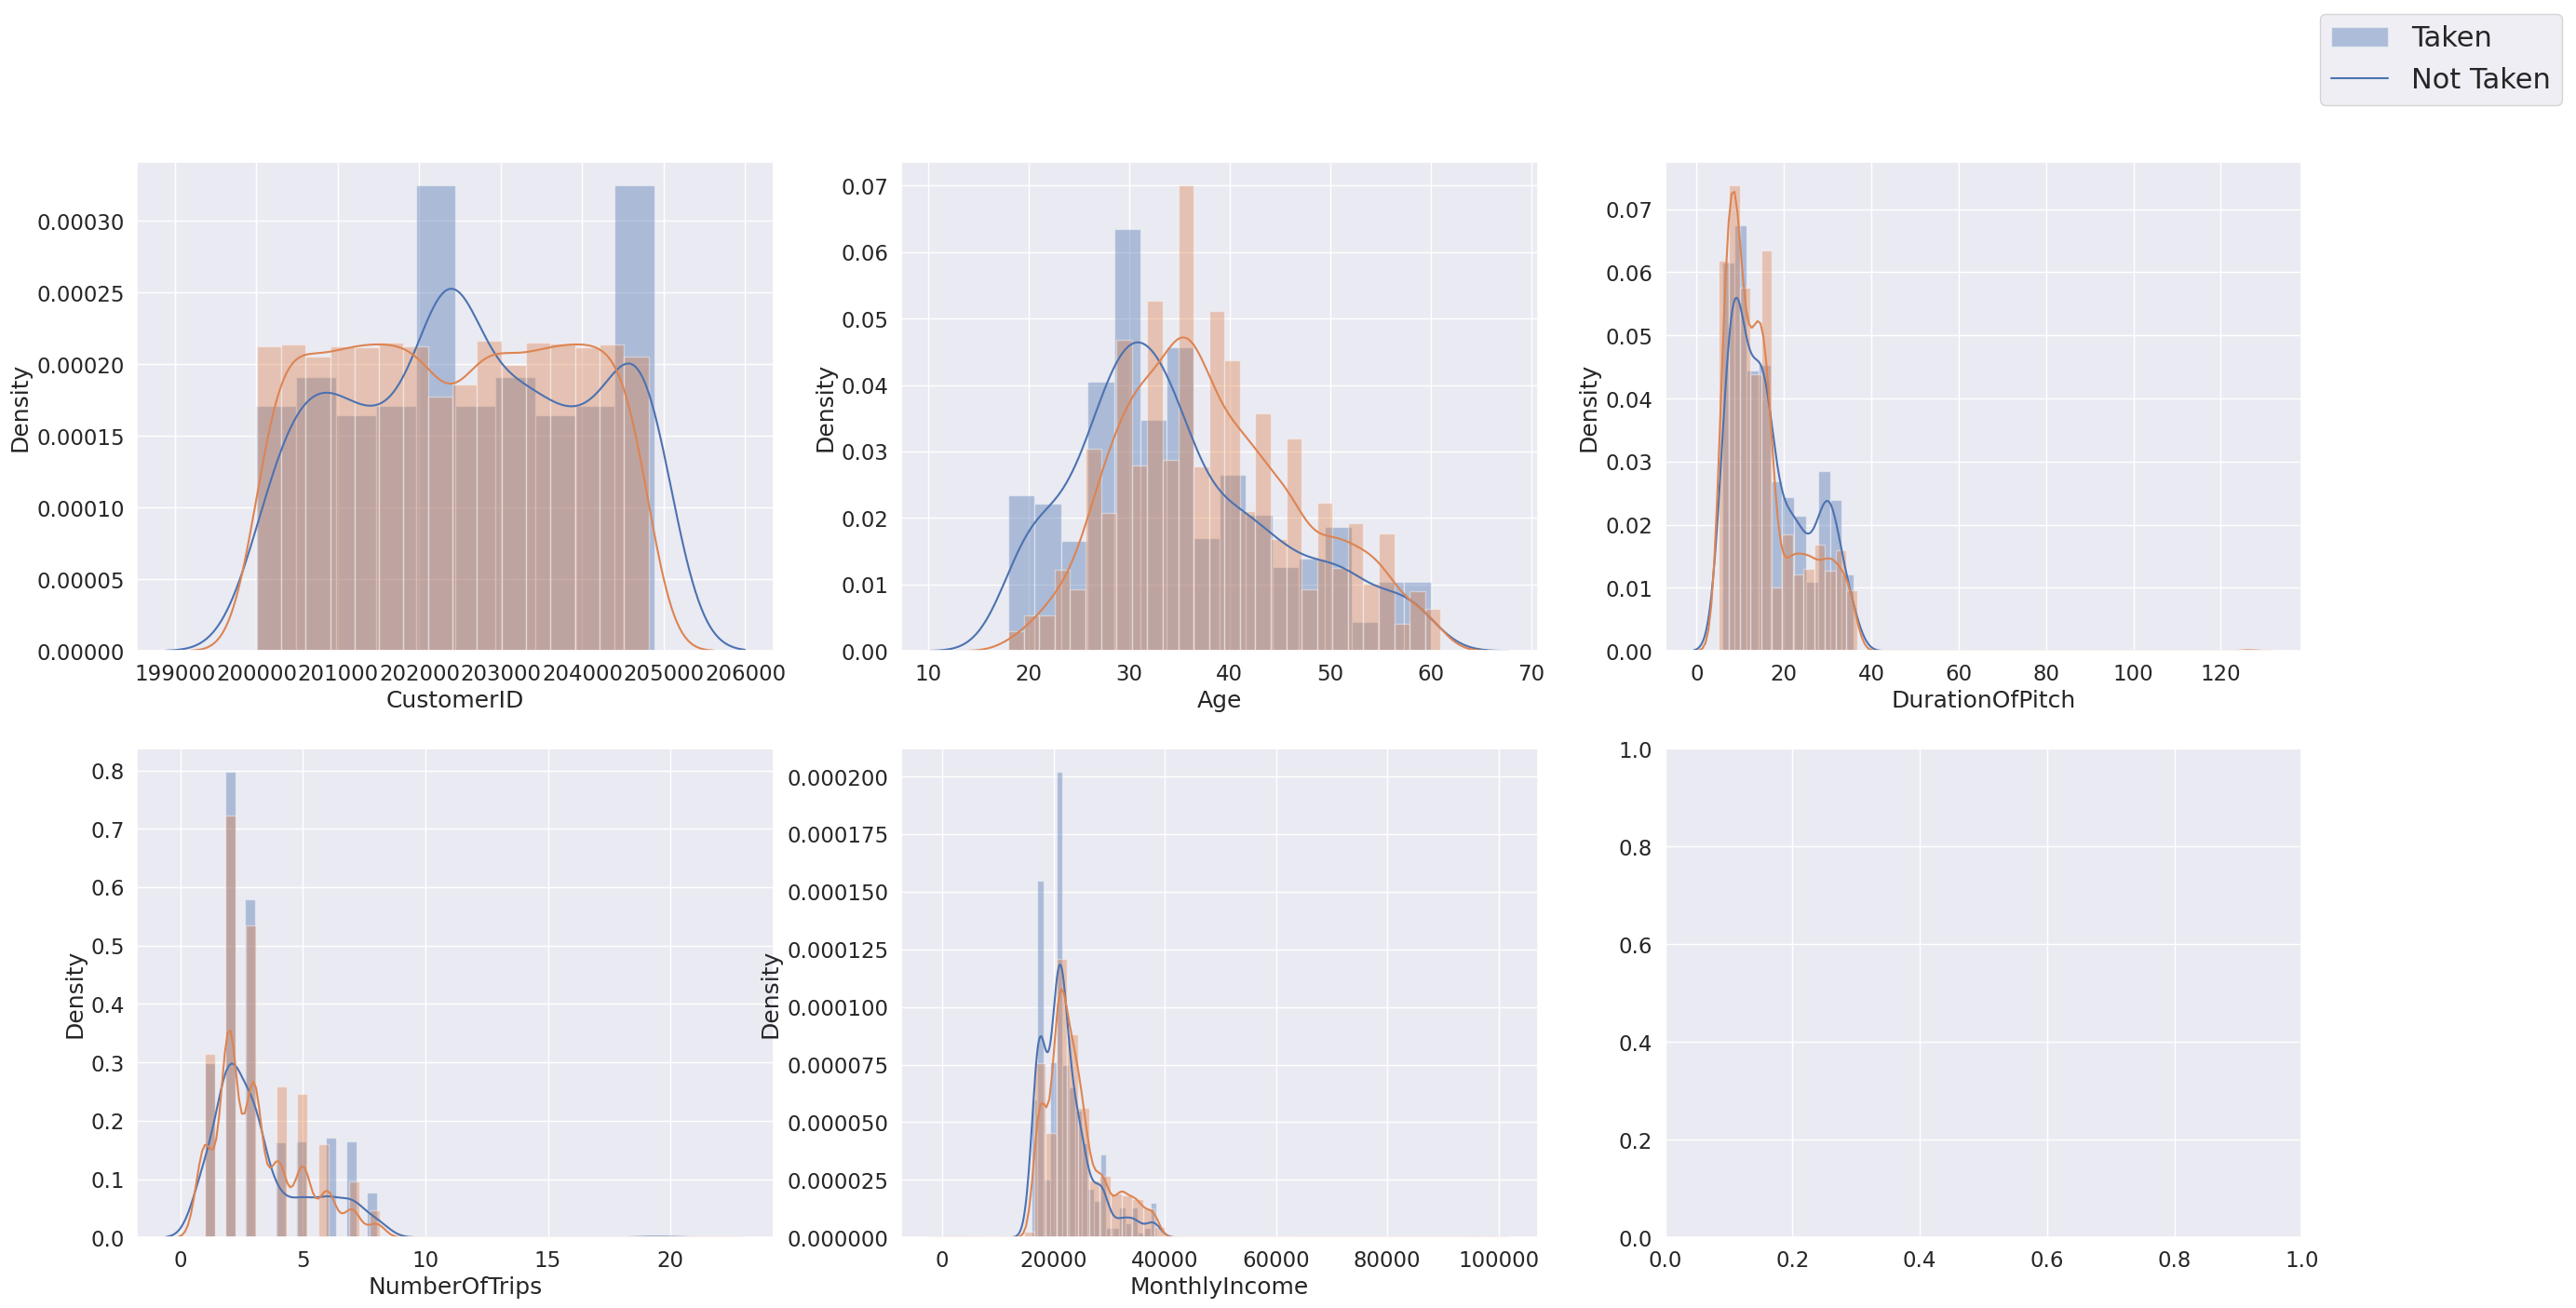

In [18]:
taken_df = numeric_df[target['ProdTaken']=="Taken"]
not_taken_df = numeric_df[target['ProdTaken']=="Not Taken"]
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(2,3, figsize=(30, 15))
i=0
for col in numeric_df:
    sns.distplot(taken_df[col],label='Taken',ax=ax[i//3][i%3])
    sns.distplot(not_taken_df[col],label='Not Taken',ax=ax[i//3][i%3])
    i=i+1
fig.legend(labels=['Taken','Not Taken'],fontsize='22')
fig.show()

### Observation:
1. Age is normally distributed
2. DurationOfPitch, NumberOfTrips and MonthlyIncome are Right skewed and have outliers
3. CustomerID is not important


In [19]:
for i in categorical_df.columns:
    print(categorical_df[i].unique())

['Self Enquiry' 'Company Invited' nan]
['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
['Female' 'Male' 'Fe Male']
['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
['Single' 'Divorced' 'Married' 'Unmarried']
['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']


#### Treating error in Gender column

In [20]:

# df.Gender = df.Gender.replace("Fe Male","Female")
# df.Gender.value_counts()

#### Checking the missing values

In [21]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [22]:
df.isna().sum()/df.shape[1]

CustomerID                   0.00
ProdTaken                    0.00
Age                         11.30
TypeofContact                1.25
CityTier                     0.00
DurationOfPitch             12.55
Occupation                   0.00
Gender                       0.00
NumberOfPersonVisiting       0.00
NumberOfFollowups            2.25
ProductPitched               0.00
PreferredPropertyStar        1.30
MaritalStatus                0.00
NumberOfTrips                7.00
Passport                     0.00
PitchSatisfactionScore       0.00
OwnCar                       0.00
NumberOfChildrenVisiting     3.30
Designation                  0.00
MonthlyIncome               11.65
dtype: float64

#### observations:
1. 8 columns have missing values
2. as with some domain knowledge age and MonthlyIncome can be related with Designation since higher the post , higher the salary and mostly can be aged customer (later will check and try to impute this missing value by grouping designations and asssigning mean to it)
3. Other columns missing values like NumberOfChildrenVisiting, NumberOfTrips, PreferredPropertyStar, NumberOfFollowups, DurationOfPitch , TypeOfContact can be imputed with some values of respective columns

#### Missing values filling

In [23]:
df.groupby(["Designation"])["MonthlyIncome"].mean()

Designation
AVP               32241.046784
Executive         19939.922507
Manager           22643.157629
Senior Manager    26637.749326
VP                35878.947826
Name: MonthlyIncome, dtype: float64

In [24]:
df.groupby(["Designation"])["MonthlyIncome"].median()

Designation
AVP               32181.0
Executive         20689.0
Manager           22922.0
Senior Manager    26425.0
VP                34999.0
Name: MonthlyIncome, dtype: float64

#### Observation: 
Not so Diff between mean and median for monthly salary so lets replace with median

In [25]:
df.groupby(["Designation"])["MonthlyIncome"].transform(lambda a: a.fillna(a.median()))

0       20993.0
1       20130.0
2       17090.0
3       17909.0
4       18468.0
         ...   
4883    26576.0
4884    21212.0
4885    31820.0
4886    20289.0
4887    24041.0
Name: MonthlyIncome, Length: 4888, dtype: float64

In [26]:
df.groupby(["Designation"])["MonthlyIncome"].transform(lambda a: a.fillna(a.median())).isna().sum()

0

## Univariate analysis

#### Converting the Categorical columns to Category Datatype

In [27]:
# creating list of category columns that are not object type
cat_cols = ["CityTier","ProdTaken","NumberOfPersonVisiting","NumberOfChildrenVisiting","PreferredPropertyStar","Passport","PitchSatisfactionScore","OwnCar"]
df[cat_cols] = df[cat_cols].astype("category")

# selecting all object datatypes and converting to category
cols = df.select_dtypes(["object"])
for i in cols.columns:
    df[i] = df[i].astype("category")

# check the dataset for updated datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   category
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   category
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   category
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

In [28]:
# summary of categorical columns
df.describe(include='category').T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
NumberOfPersonVisiting,4888,5,3,2402
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4862.0,3.0,3.0,2993.0
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466


**Observations:**

The datatype of Categorical columns is fixed now
1. Self Inquiry is the most preffered Type of Contact
2. ProdTaken : There is heavy imbalance in this column where atleast 80% customers did not purchase any product
3. CityTier : Most customers are from Tier 1
4. Occupation : Most customers earn a salary
5. Gender : Male customers are slightly higher than Female Customers
6. NoOfPersonsVisting: Most customers plan to take atleast 3 additional persons with them in the trip
7. ProductPitched : Basic is the popular product
8. MaritalStatus : Most customers are married
9. Passport : Most customers dont have a passport
10. PitchSatisfactionScore : Most customers have rated 3.0 
11. OwnCar: Most customers own a car
12. NumberofChildrenVisting : Most customers plan to take atleast 1 child under five with them for the trip.
13. Designation : Most customers belong to Executive designation

#### Some function to plot graph

In [29]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="Winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="blue", linestyle="-")
    plt.show()  # show the plot


# labeled_barplot
def labeled_barplot(data, feature, perc=False, v_ticks=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    if v_ticks is True:
        plt.xticks(rotation=90)
        
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot


#### CustomerID

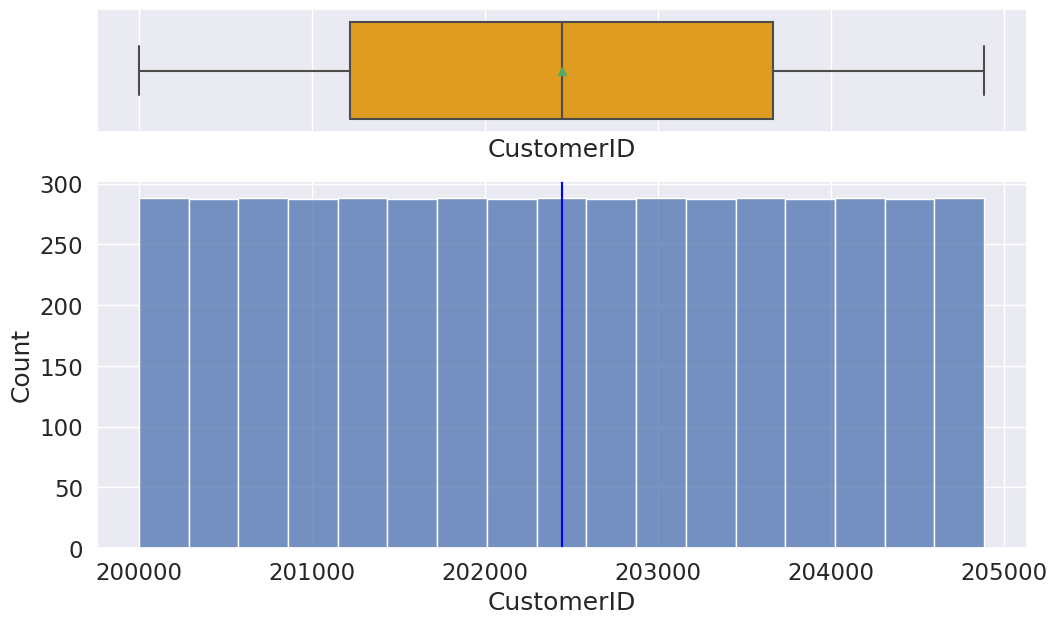

In [30]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"CustomerID")

**Observations:**

1. CustomerID shows balanced data as it is sequential tracking number.
2. CutomerID is only for identifying the customer record.
3. We will not use this column in model building.

#### ProdTaken - Target Variable

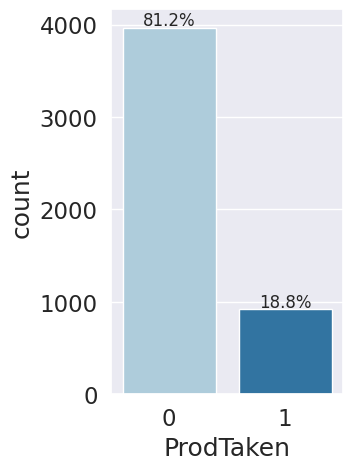

In [31]:
# using label_barplot function to plot the graph
labeled_barplot(df,"ProdTaken", perc=True, v_ticks=False) 

**Observations:**

We see that only 18.8% of the total customers purchased any of the travel package.The plot shows heavy imbalance in the dataset.

#### Age

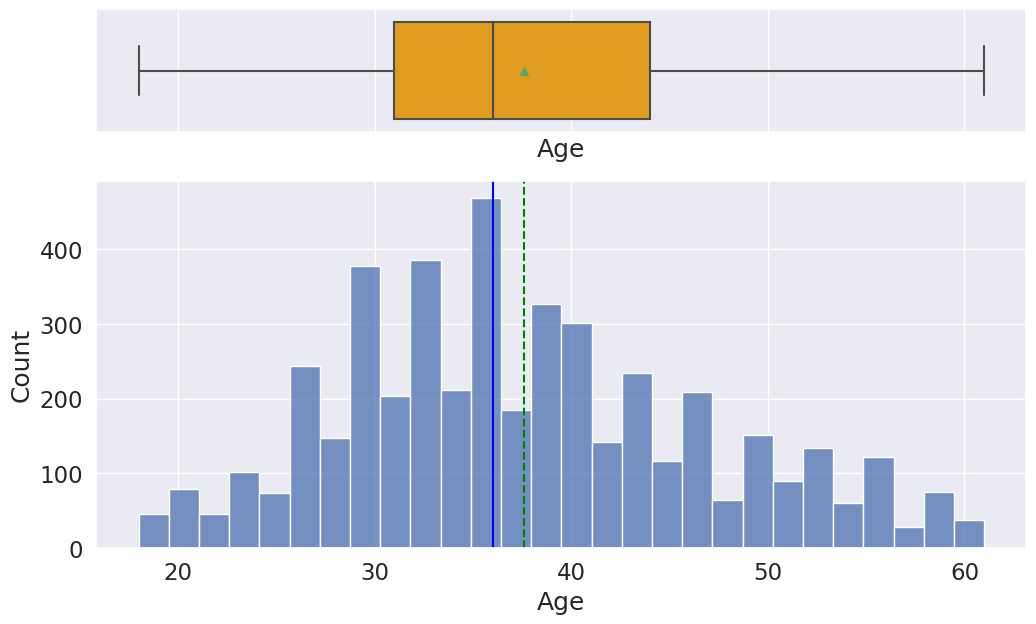

In [32]:
# use the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"Age")

**Observations:**

Age variable is almost normally distributed with no outliers. we see that most customers are in the age brackets 25- 45 yrs.

#### TypeofContact

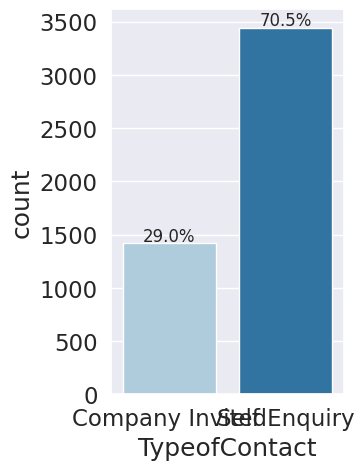

In [33]:
# use label_barplot function to plot the graph
labeled_barplot(df,"TypeofContact",True,False)

**Observations:**

Self-Enquiry is the most preferred contact method by the customers at 70.5%

#### CityTier

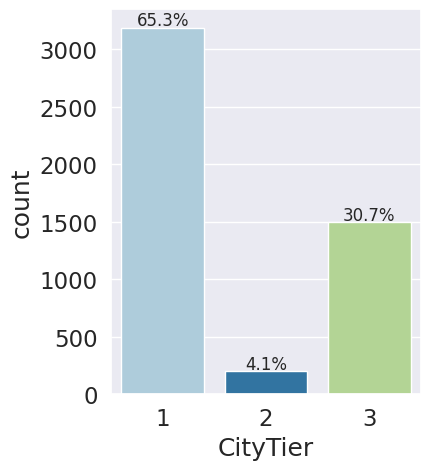

In [34]:
# using label_barplot function to plot the graph
labeled_barplot(df,"CityTier",True,False) 

**Observations:**

65.3% of customers are from Tier 1 cities and Tier3 cities comes second at 30.7%.

#### DurationOfPitch

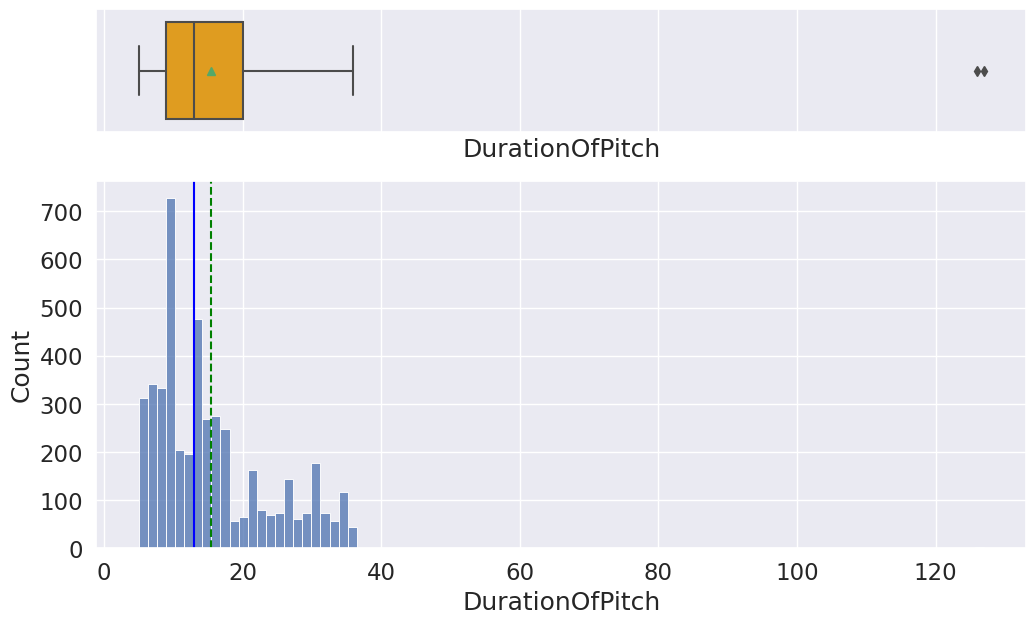

In [35]:
# using the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"DurationOfPitch") 

**Observations:**
1. DurationofPitch is  right-skewed.
2. most customer"s pitch duration was under 22 mins. 
3. We also see few outliers at 120+ mins. 

#### Occupation

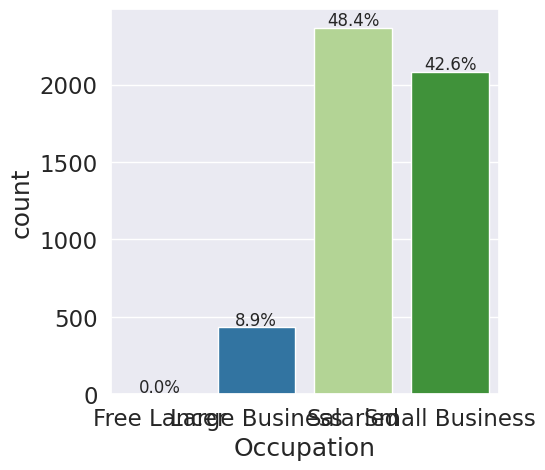

In [36]:
# using label_barplot function to plot the graph
labeled_barplot(df,"Occupation",True, False) 

**Observations:**

1. 48.4% of customers are Salaried.
2. Customers with Small Business are the next highest in Occupation at 42.6%. 
3. There are very few Free Lancers as well.

#### Gender

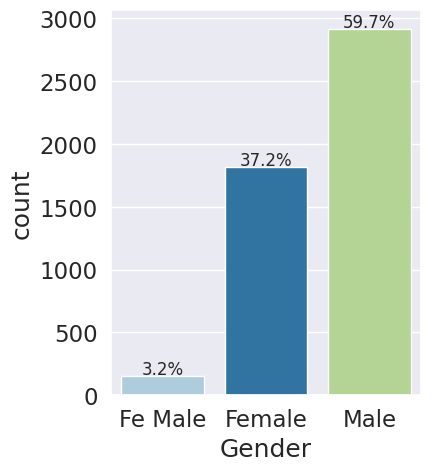

In [37]:
# use label_barplot function to plot the graph
labeled_barplot(df,"Gender",True, False) 

**Observations:**

1. miss class is present i.e 'Fe male' is same as 'Female'
2. Number of Male customers(59.7%) are higher than Female customers (3.2 + 37.2 = 40.4%).

#### NumberOfPersonVisiting

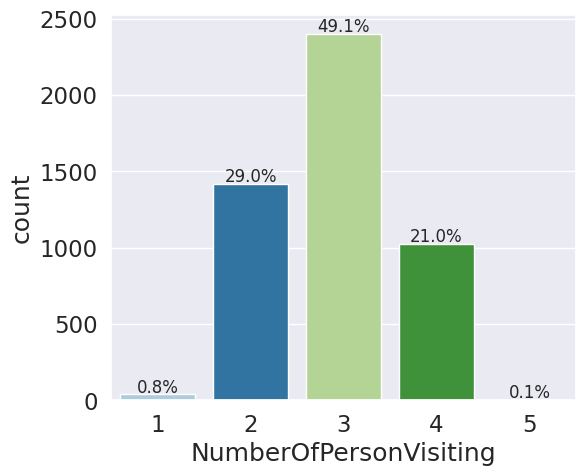

In [38]:
# using label_barplot function to plot the graph
labeled_barplot(df,"NumberOfPersonVisiting",True, False) 

**Observations:**

1. 49.1% of customers plan to take at least 3 persons with them during trip. 
2. Around 29% customers want to take 2 people.
3. 21% customers want to take 4 additional persons with them during their travel.

#### NumberOfFollowups

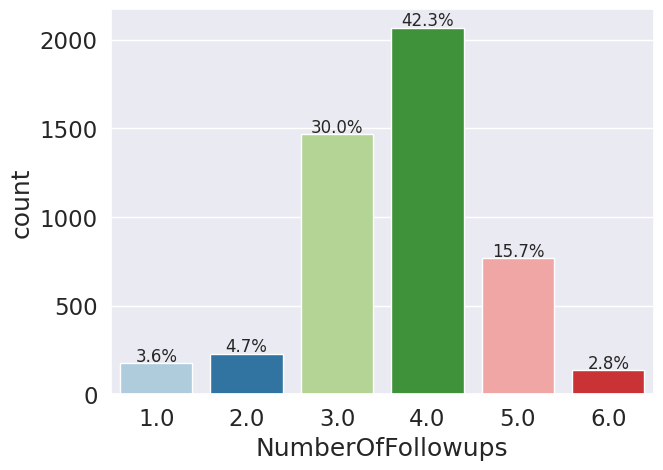

In [39]:
# use label_barplot function to plot the graph
labeled_barplot(df,"NumberOfFollowups",True, False)

**Observations:**

The highest number of followups is 4.0 followed by 3.0 and 5.0.

#### ProductPitched

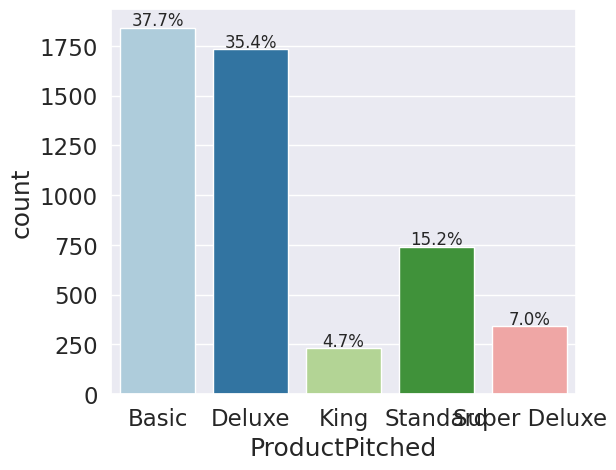

In [40]:
# using label_barplot function to plot the graph
labeled_barplot(df,"ProductPitched",True, False) 

**Observations:**

1. Basic(37.7%) and Deluxe(35.4%) are the most popular travel packages. 
2. The next slightly popular one is the Standard Travel package at 15.2%.

#### PreferredPropertyStar

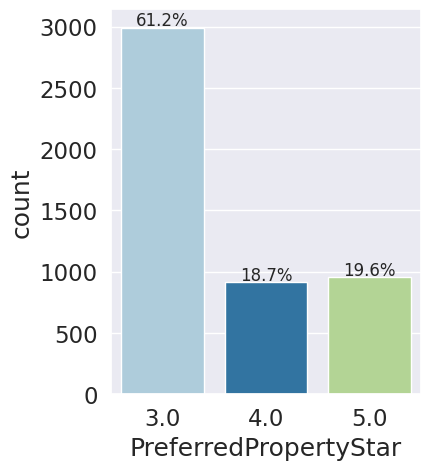

In [41]:
# use label_barplot function to plot the graph
labeled_barplot(df,"PreferredPropertyStar",True, False) 

**Observations:**

61.8% customers prefer a three star hotel rating compared to four (18.7%) and five (19.6%) star rating hotels

#### MaritalStatus

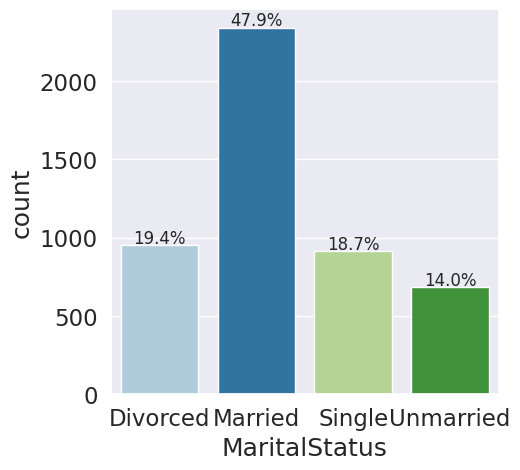

In [42]:
# using label_barplot function to plot the graph
labeled_barplot(df,"MaritalStatus",True, False) 

**Observations:**

1. Married customers form the bulk of the data at 47.9%.
2. Divorced (19.4%) and Single (18.7%) coming in close at second and third place. 
3. Unmarried customers with partners form 14% of the data.

#### NumberOfTrips

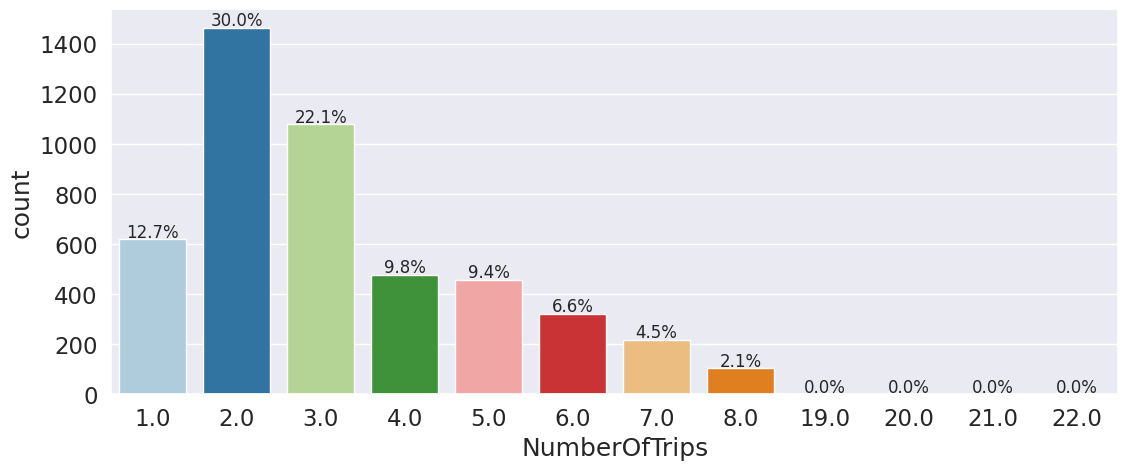

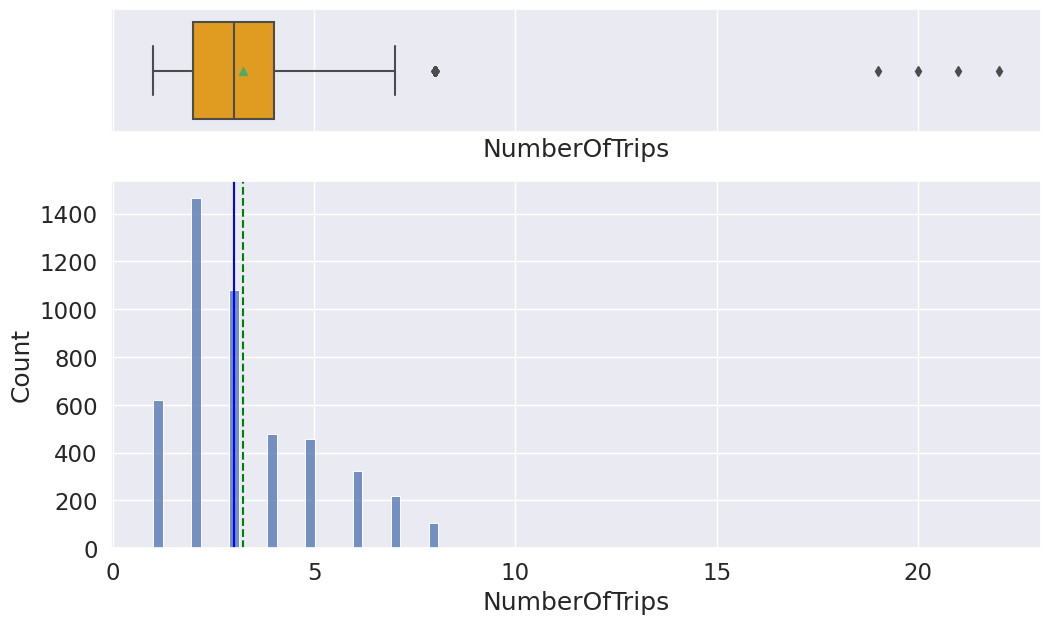

In [43]:
# using label_barplot function to plot the graph
labeled_barplot(df,"NumberOfTrips",True, False) 

# using the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"NumberOfTrips") 


**Observations:**

1. NumberofTrips is right-skewed a little and majority of the customers seem to take at least 2 trips per year. 
2. Also saw very few outliers in the higher end.

#### Passport

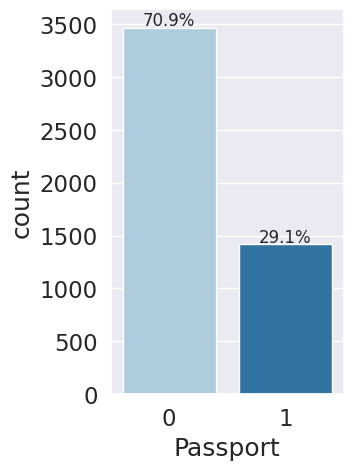

In [44]:
# using label_barplot function to plot the graph
labeled_barplot(df,"Passport",True, False) 

**Observations:**

Only 29.1% of customers have a passport

#### PitchSatisfactionScore

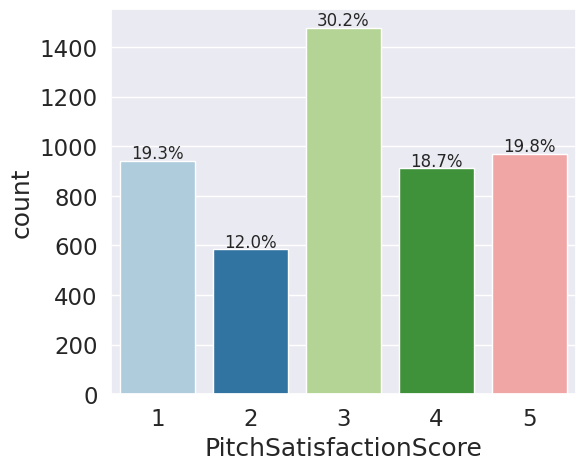

In [45]:
# using label_barplot function to plot the graph
labeled_barplot(df,"PitchSatisfactionScore",True, False)

**Observations:**

1. Only 30.2% of customers rated the Sales Pitch with a score of 3. Even though 18.7% customers rated at 4.
2. 19.8% rated a pitch score of 5.
3. we also see that 19.3% rated the Sales pitch score at 1. 
4. This shows a need for improvement in this area

#### OwnCar

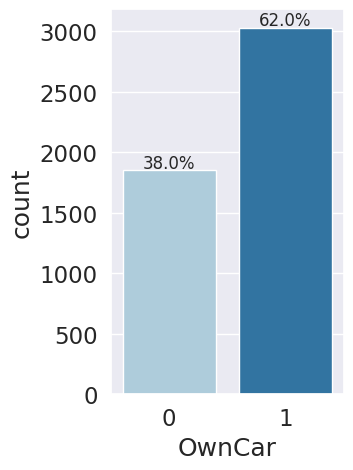

In [46]:
# using label_barplot function to plot the graph
labeled_barplot(df,"OwnCar",True, False) 

**Observations:**

62% Customers have their own cars

#### NumberOfChildrenVisiting

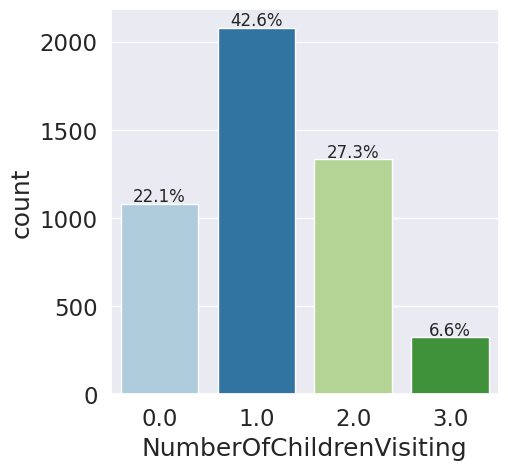

In [47]:
# using label_barplot function to plot the graph
labeled_barplot(df,"NumberOfChildrenVisiting",True, False) 

**Observations:**

Around 42.6% of customers have at least one child are planning to accompany them in the travels.

#### Designation

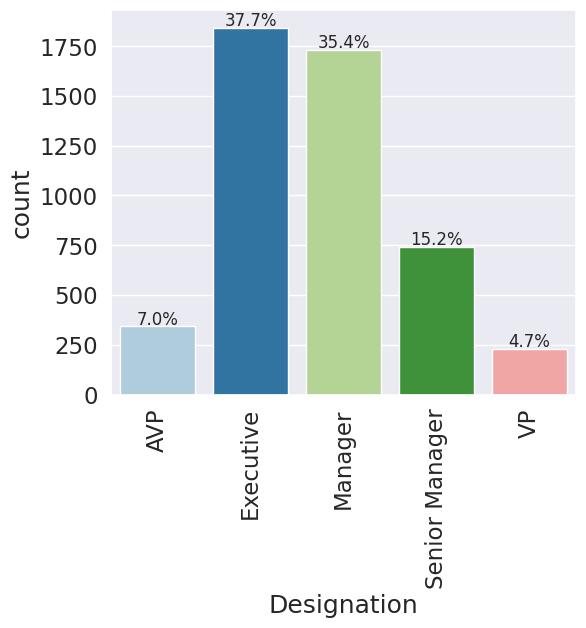

In [48]:
# using label_barplot function to plot the graph
labeled_barplot(df,"Designation",True, True) 

**Observations:**

Executive (37.7%) and Manager(35.4%) are the highest Designations of the customers in the dataset.

#### MonthlyIncome

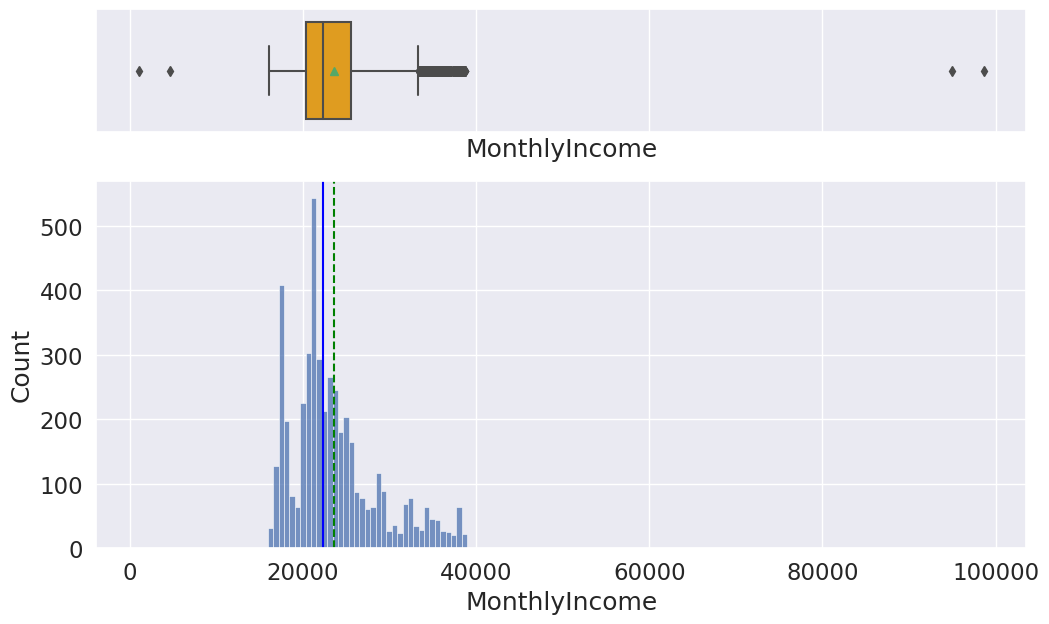

In [49]:
# using the defined function histogram_boxplot to plot the graphs
histogram_boxplot(df,"MonthlyIncome") 

**Observation:**

1. MonthlyIncome is right-skewd. 
2. However, we see that the majority of customers are between income bracket 17K dollars and 30K dollars. 
3. We also see two outliers in the low end and on the highest end. 
4. There are several outliers after the approx 35K dollars income level.

## Bivariate Analysis

In [50]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### TypeofContact VS ProdTaken

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


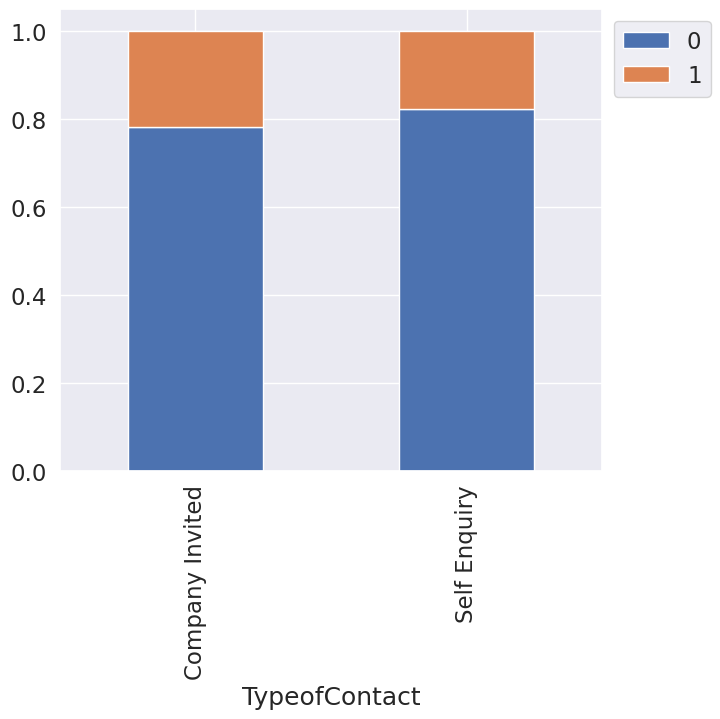

In [51]:
# using the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "TypeofContact", "ProdTaken")

**Observations:**

More Customers with "Company Invited" contact have bought Travel Package when compared to Customers with "Self Enquiry".

### CityTier VS ProdTaken

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


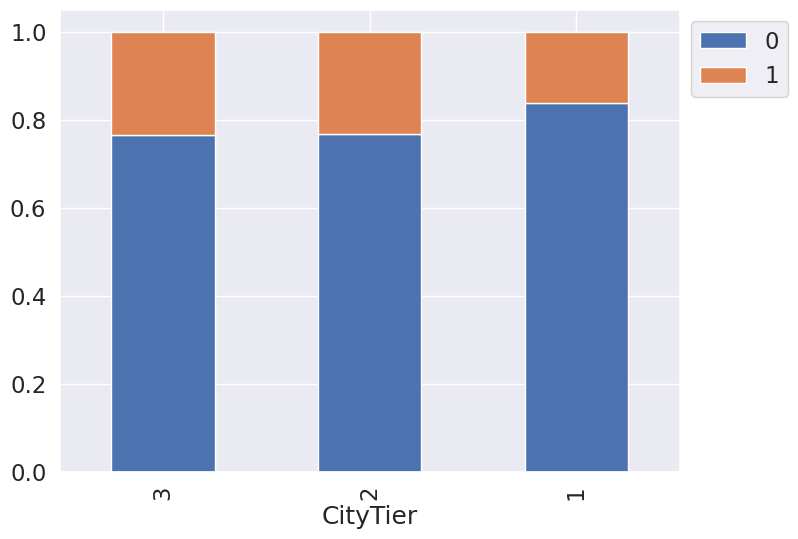

In [52]:
# using the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "CityTier", "ProdTaken")

**Observations:**

More Customers from Tier 2 and 3 cities have purchased Travel Packages.

### Occupation VS ProdTaken

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


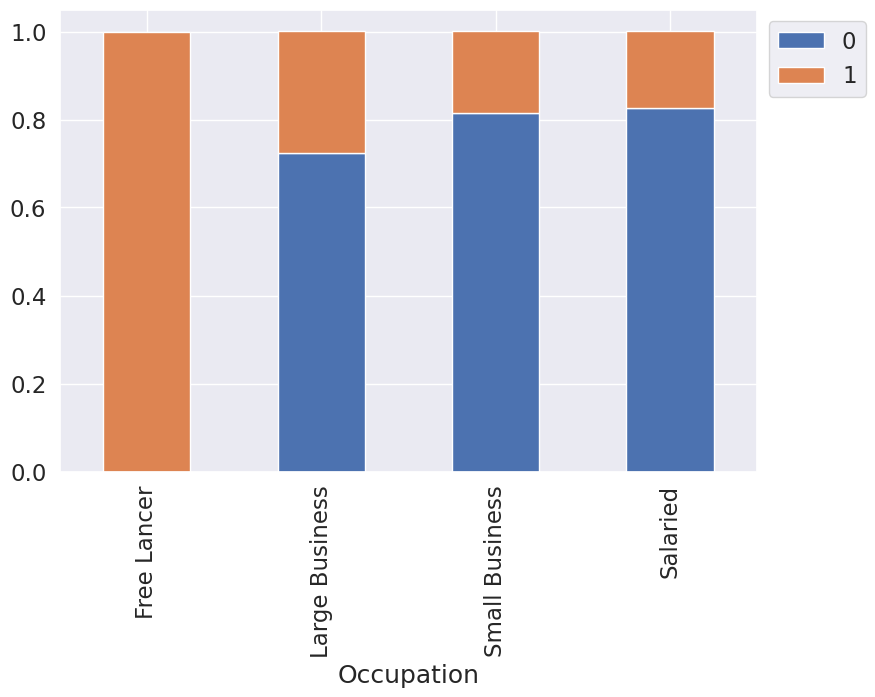

In [53]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "Occupation", "ProdTaken")

**Observations:**

1. Customers who are  Freelancers by Occupation have bought travel packages. However the sample size is only two. 
2. Of the 434 Large Business owning customers, almost 30% bought travel packages. 
3. Among Salaried and Small Business owning customers,close to 20% have bought travel packages.

### Gender VS ProdTaken

In [54]:
a = df.copy(deep=True)
a.Gender = a.Gender.replace("Fe Male","Female")
a["Gender"].unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


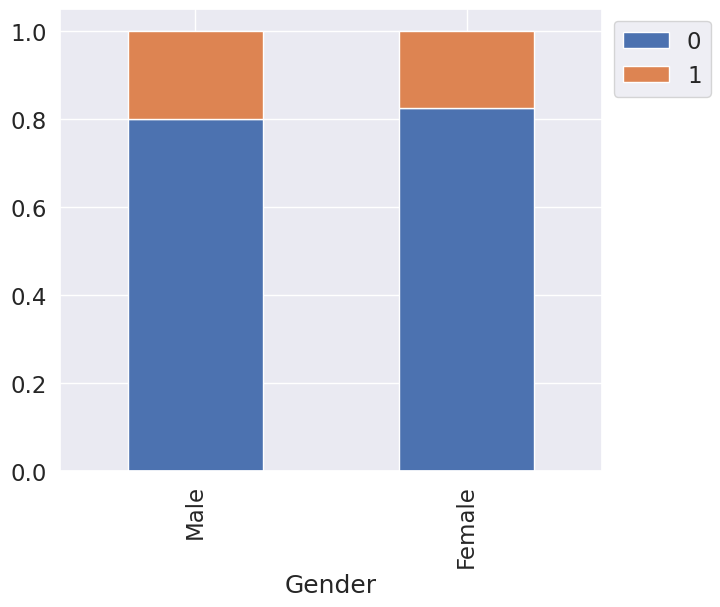

In [55]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(a, "Gender", "ProdTaken")

**Observations:**

Number of Male customers are higher than Female customers, however we dont see a lot of difference in the percentage of each Gender select the Product.

### NumberOfPersonVisiting VS ProdtTaken

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


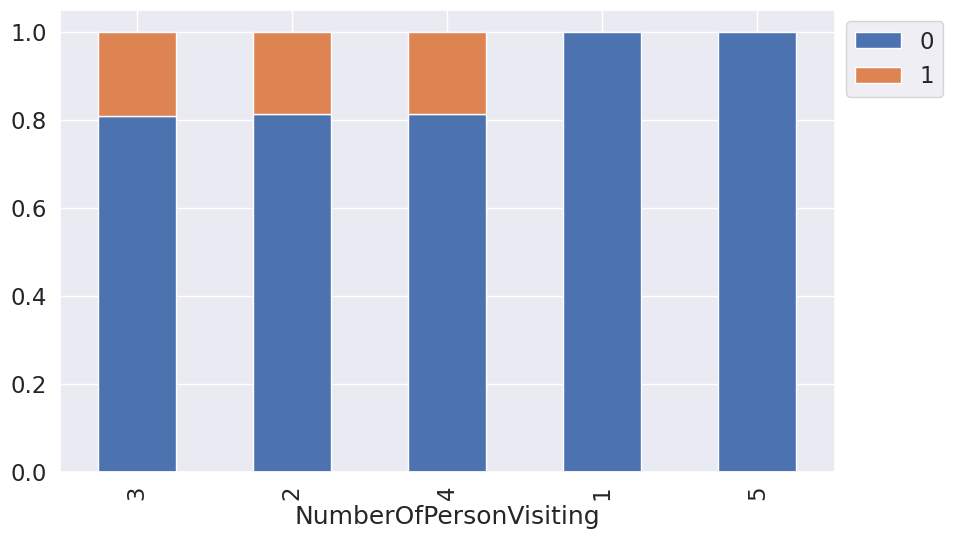

In [56]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "NumberOfPersonVisiting", "ProdTaken")

**Observations:**

1. Customers who plan to take between 2-4 persons with them during travel, close to 20%  have bought a travel package product.
2. We see that all Customers with one companion and five companions, did not purchase any product. 
3. This suggests that the products don"t seem either appealing or beneficial to the customers of the above two categories. 
4. Business should focus on this area.

### ProductPitched VS ProdTaken

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


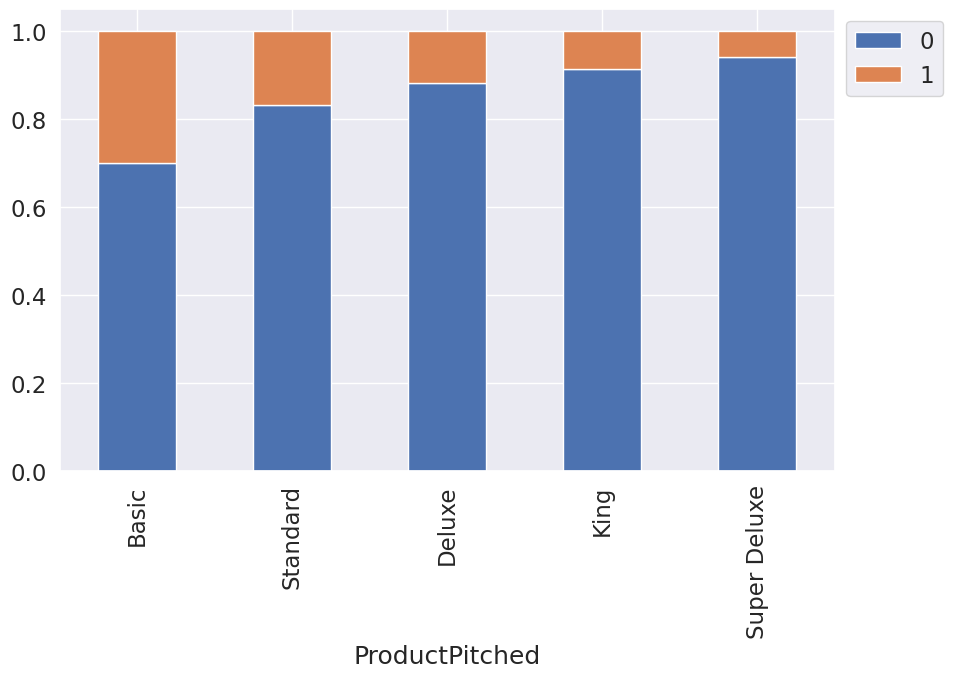

In [57]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "ProductPitched", "ProdTaken")

**Observations:**

1. The Basic Package is the most preferred 
2. Standard and Deluxe are following.
3. Very few customers purchased Super Deluxe products.

### PreferredPropertyStar

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3948  914  4862
3.0                    2511  482  2993
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


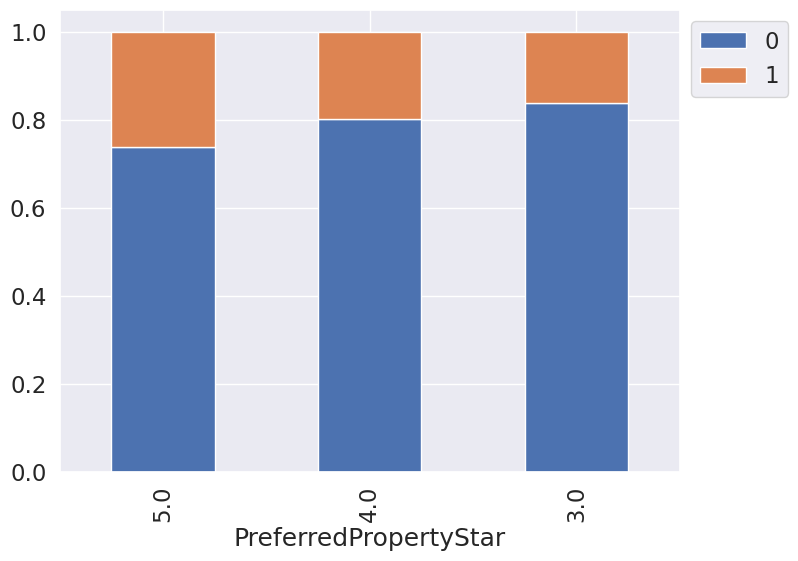

In [58]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "PreferredPropertyStar", "ProdTaken")

**Observations:**

1. Though majority of customers prefer a 3.0 star rated Property, the percentage of customers purchasing the products is comparatively less than customers who prefer a 4.0 and 5.0 star rated property.
2. The higher the property star rating, higher the number of customers who purchased a product.

### MaritalStatus VS ProdTaken

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


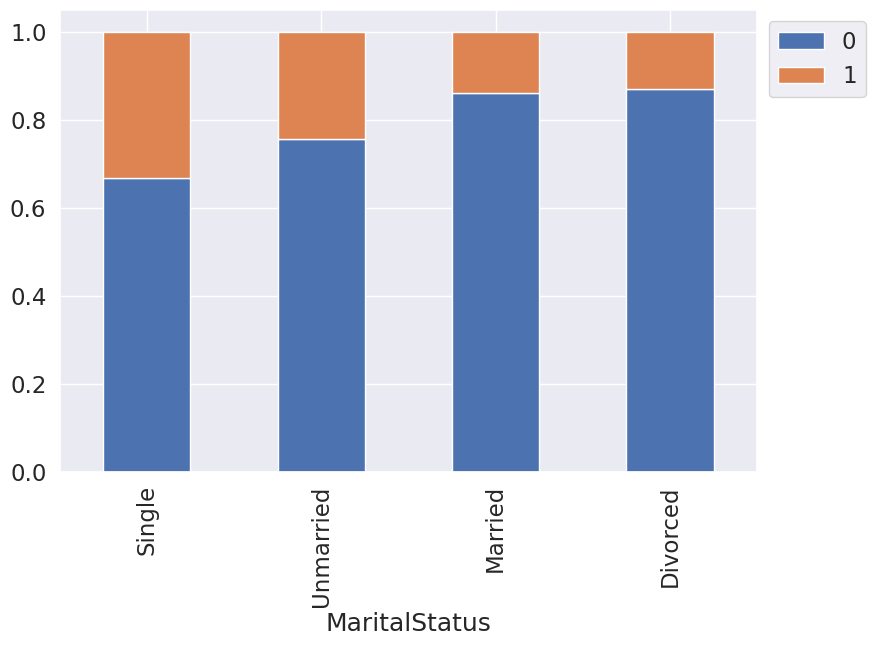

In [59]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "MaritalStatus", "ProdTaken")

**Observations:**

1. Around 30% of all Single customers have bought a product and about 25% of Unmarried customers have also purchased a product.
2. Almost 50% of the total customers belong to the married category, but we see that only approx 15% of them have actually purchased any product.

### Passport VS ProdTaken

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


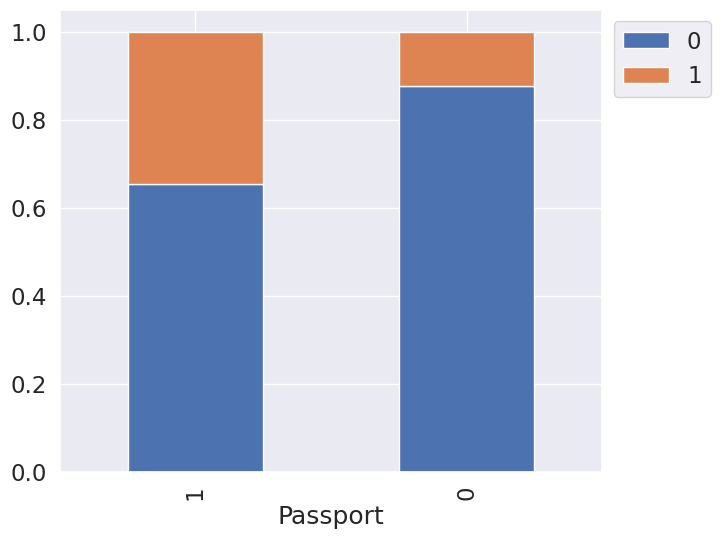

In [60]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "Passport", "ProdTaken")

**Observations:**

Customers with passport tend to purchase products than those who don"t.

### PitchSatisfactionScore VS ProdTaken

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


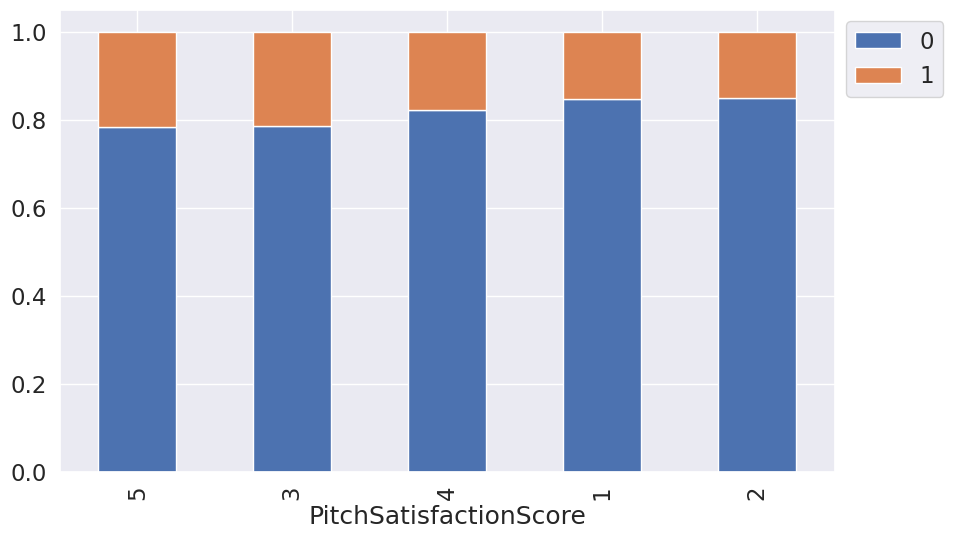

In [61]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "PitchSatisfactionScore", "ProdTaken")

**Observations:**

1. Majority of customers have given a score of 3.0 to the Sale pitch for the products.
2. But we observe that the number of customers who purchased any product is almost equal across all pitch scores. 

### OwnCar VS ProdTaken

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


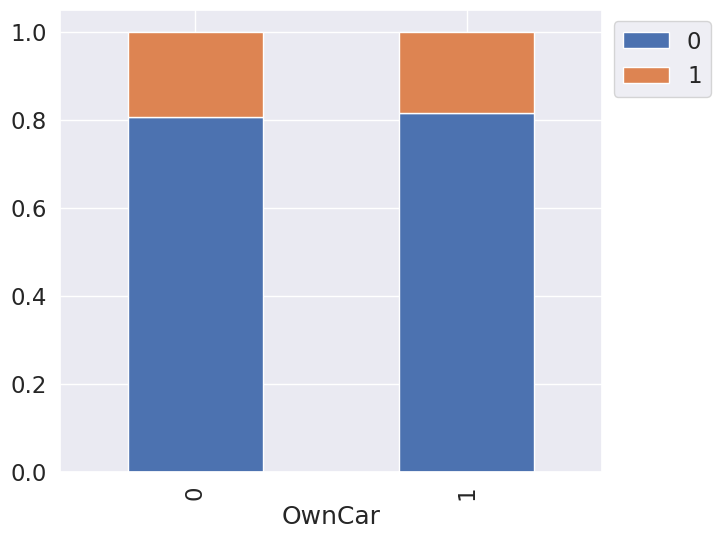

In [62]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "OwnCar", "ProdTaken")

**Observations:**

There is hardly any difference in the percentage of customers with or without cars, purchasing the product.

### NumberOfChildrenVisiting VS ProdTaken

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3909  913  4822
1.0                       1688  392  2080
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


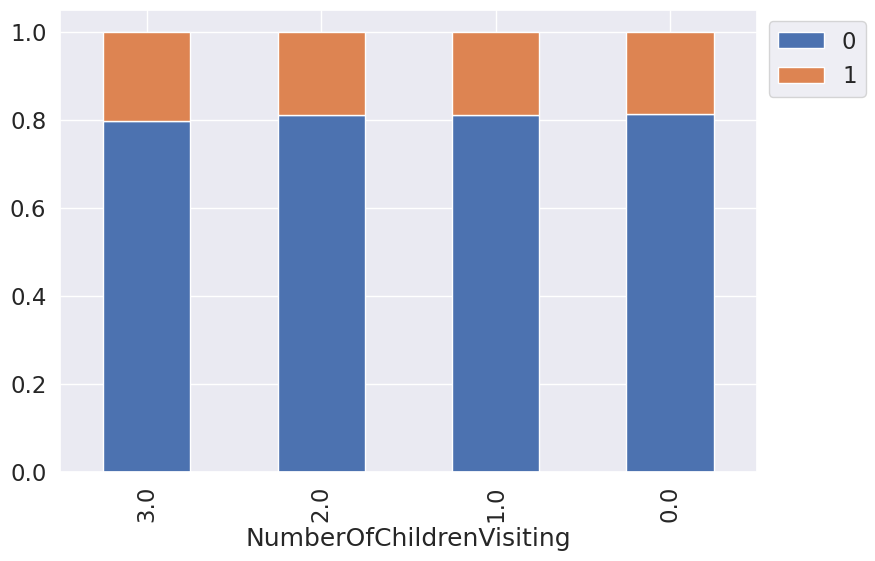

In [63]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "NumberOfChildrenVisiting", "ProdTaken")

**Observations:**

Seen that the percentage of customers who purchased a product is fairly same across all categories of variable NumberOfChildrenVisiting.

### Designation

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


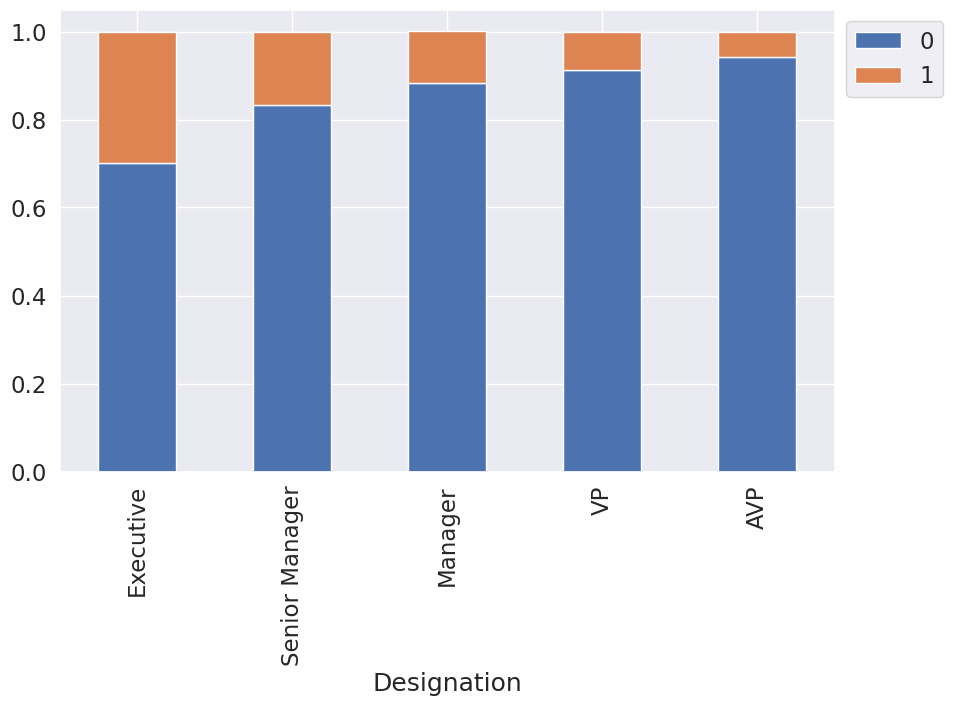

In [64]:
# use the defined function stacked_barplot to plot the graphs
stacked_barplot(df, "Designation", "ProdTaken")

**Observations:**

1. Around 30% Customers with Executive Designation have purchased a product.
2. Sr. Manager - 16% and Manager - 11% Designation customers have purchased a product. 
3. Very few customers of VP and AVP Designation have purchased a product. 

### Comparision of Numerical Variables with ProdTaken to understand the relation

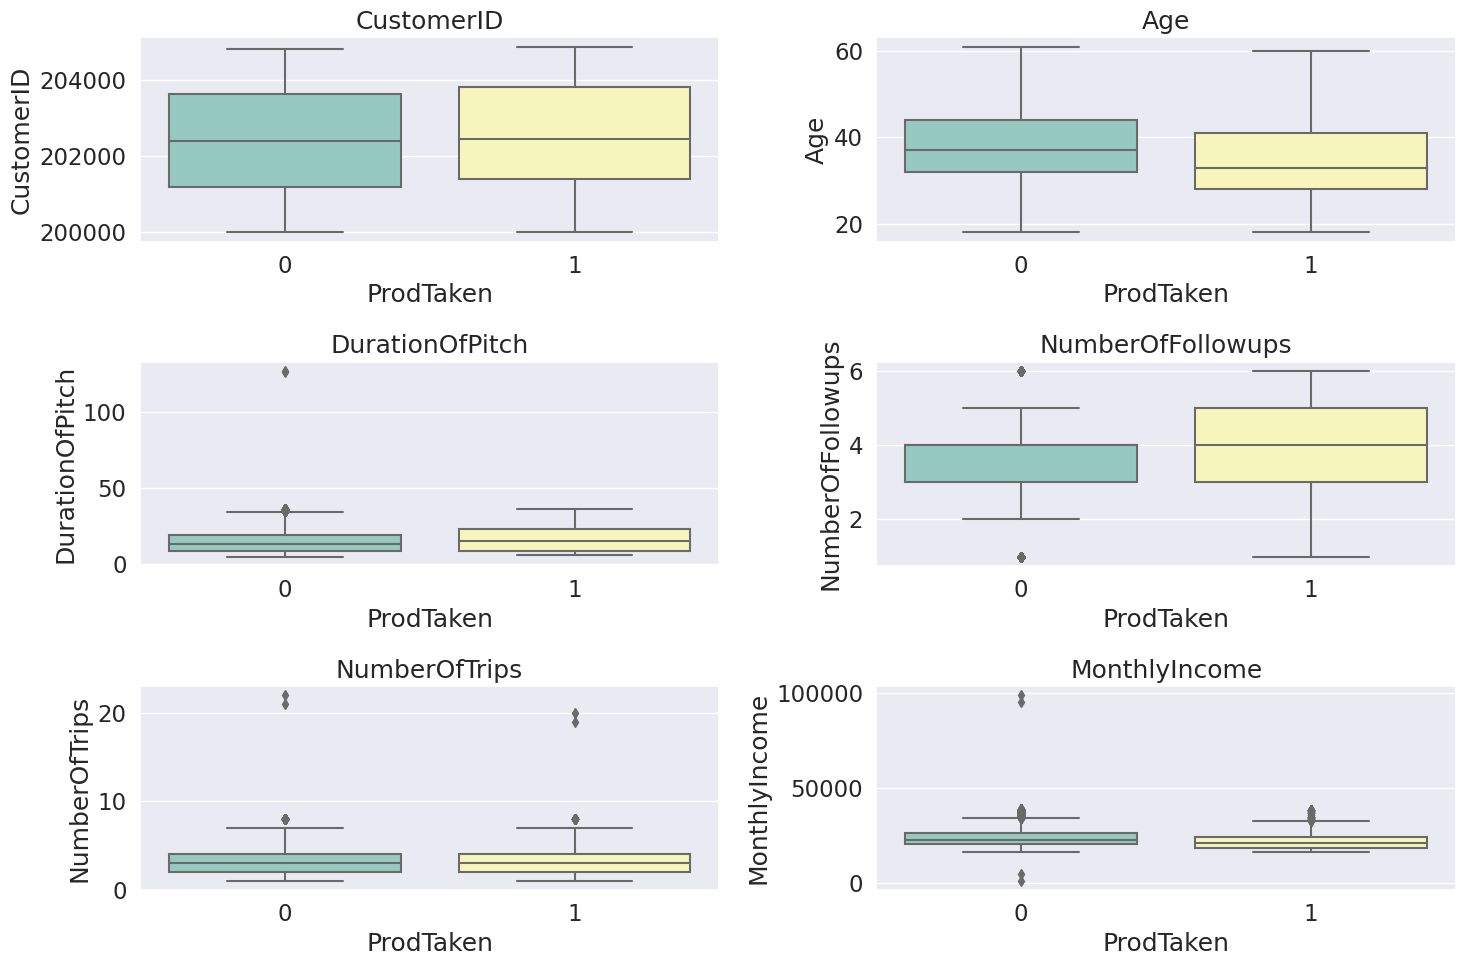

In [65]:
# for all numerical variables with Personal_Loan draw box plots
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15,10))
for i, variable in enumerate(num_cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(x=df["ProdTaken"],y=df[variable], palette="Set3")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Observations:**

1. The mean Age for customers who purchased any Product is slightly less than those who didn"t. 
2. The mean DurationofPitch for both classed of ProdTaken is almost equal. We see there are many outliers in Class "0" of ProdTaken,
suggesting that longer pitch durations doesn"t lead to product purchase.
3. Customers who purchased the packages had an average of at least four followups, compared to customers who didnt.
4. The Averages for NumberofTrips and MonthlyIncome;for both Classes of ProdTaken is almost equal. 
5. MonthlyIncome variable has several outliers in the higher end for both ProdTaken classes and very few in low end of Class "0".
6. We also see that Age variable doesn"t have any outliers.
7. CustomerID Column is not relevant for analysis, we will exclude the same from model building.

#### Correlation Matrix

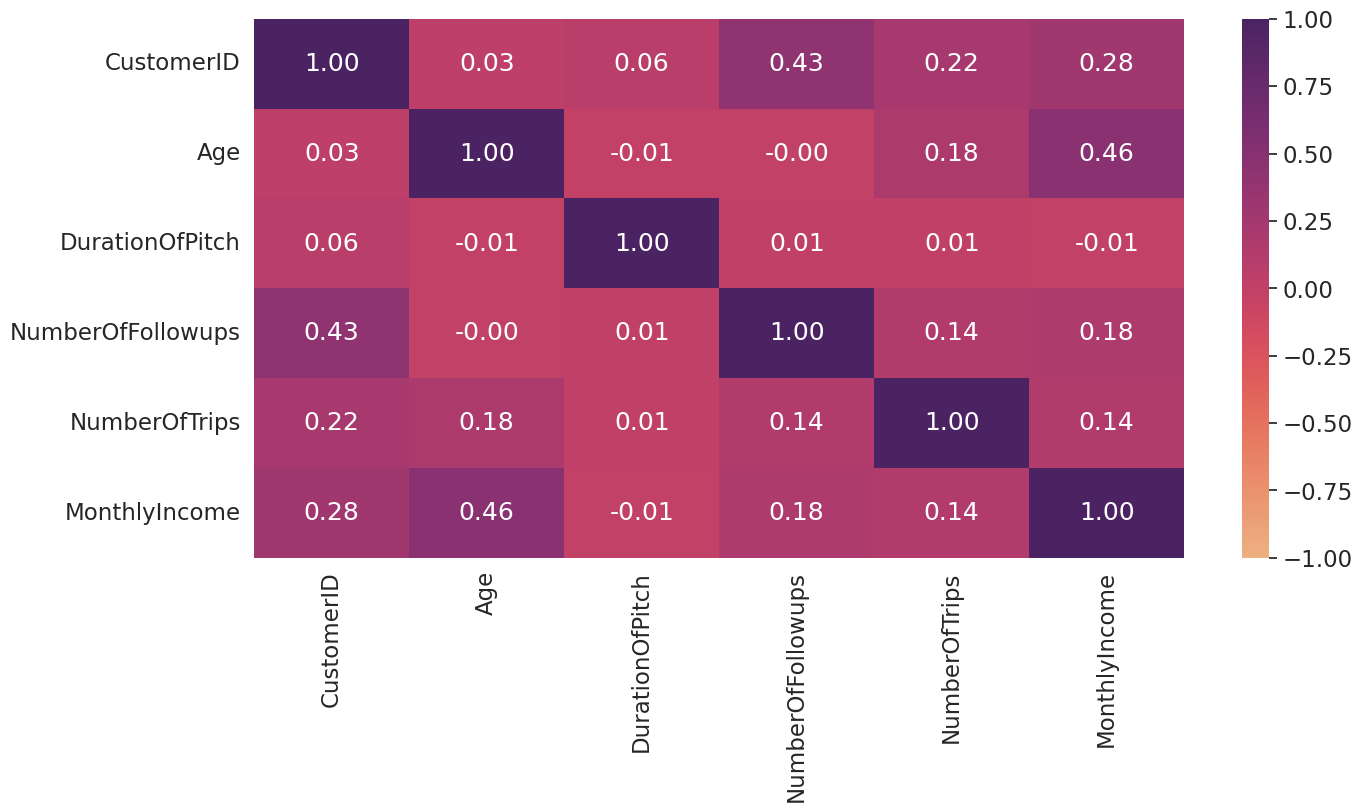

In [66]:
# heatmap for correlation
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="flare")
plt.show()

**Observations:**

1. The correlation values are quite low between all the variables.
2. MonthlyIncome and Age have the highest positive correlation at 0.47; i.e as Age increases, so does MontlyIncome
3. NumberofFollowups and NumberofTrips have a  moderate positive correlation between them and also individually with Monthly Income. 

## Before doing any imputation  i have to split the data to prevent some data leakage
### and try to do something so that the ``values by which missing values are imputed must be stored since this will be used in prediction

In [67]:
# split the columns in Dependent and Independent Set
X= df.drop(["ProdTaken"],axis=1)
y= df["ProdTaken"]


# splitting data into training and test set, use stratify to maintain the original distribution of Dependent variable as of original set for prediction
X_train_all ,X_test, y_train_all, y_test =train_test_split(X,y, test_size=0.15, random_state=25,stratify=y)


# further i will be splitting X_train_all and y_train_all for model validation
# creating a listb of column names
feature_names = X_train_all.columns.to_list()

In [68]:
X_train_all.shape

(4154, 19)

In [69]:
y_train_all.shape

(4154,)

In [70]:

# df["MonthlyIncome"] = df.groupby(["Designation"])["MonthlyIncome"].transform(lambda a: a.fillna(a.median()))

## Data Preprocessing

In [71]:
# splitting data for model valdation
X =  X_train_all.reset_index(drop=True)
y =  y_train_all.reset_index(drop=True)


In [72]:
X_train ,X_val, y_train, y_val = train_test_split(X, y, test_size=0.14, random_state=30,stratify=y)

In [73]:
### Convert the Categorical columns to Category Datatype

# creating list of category columns that are not object type
cat_cols = ["CityTier","ProdTaken","NumberOfPersonVisiting","NumberOfChildrenVisiting","PreferredPropertyStar","Passport","PitchSatisfactionScore","OwnCar"]
df[cat_cols] = df[cat_cols].astype("category")

# selecting all object datatypes and converting to category
cols = df.select_dtypes(["object"])
for i in cols.columns:
    df[i] = df[i].astype("category")

# check the dataset for updated datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   category
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   category
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   category
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

### Check the missing values

In [74]:
# check number of null records
X_train.isna().sum()

CustomerID                    0
Age                         164
TypeofContact                23
CityTier                      0
DurationOfPitch             192
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            32
ProductPitched                0
PreferredPropertyStar        21
MaritalStatus                 0
NumberOfTrips               102
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     42
Designation                   0
MonthlyIncome               174
dtype: int64

In [75]:
y_train.isna().sum()

0

In [76]:
# !pip install missingno

<AxesSubplot: >

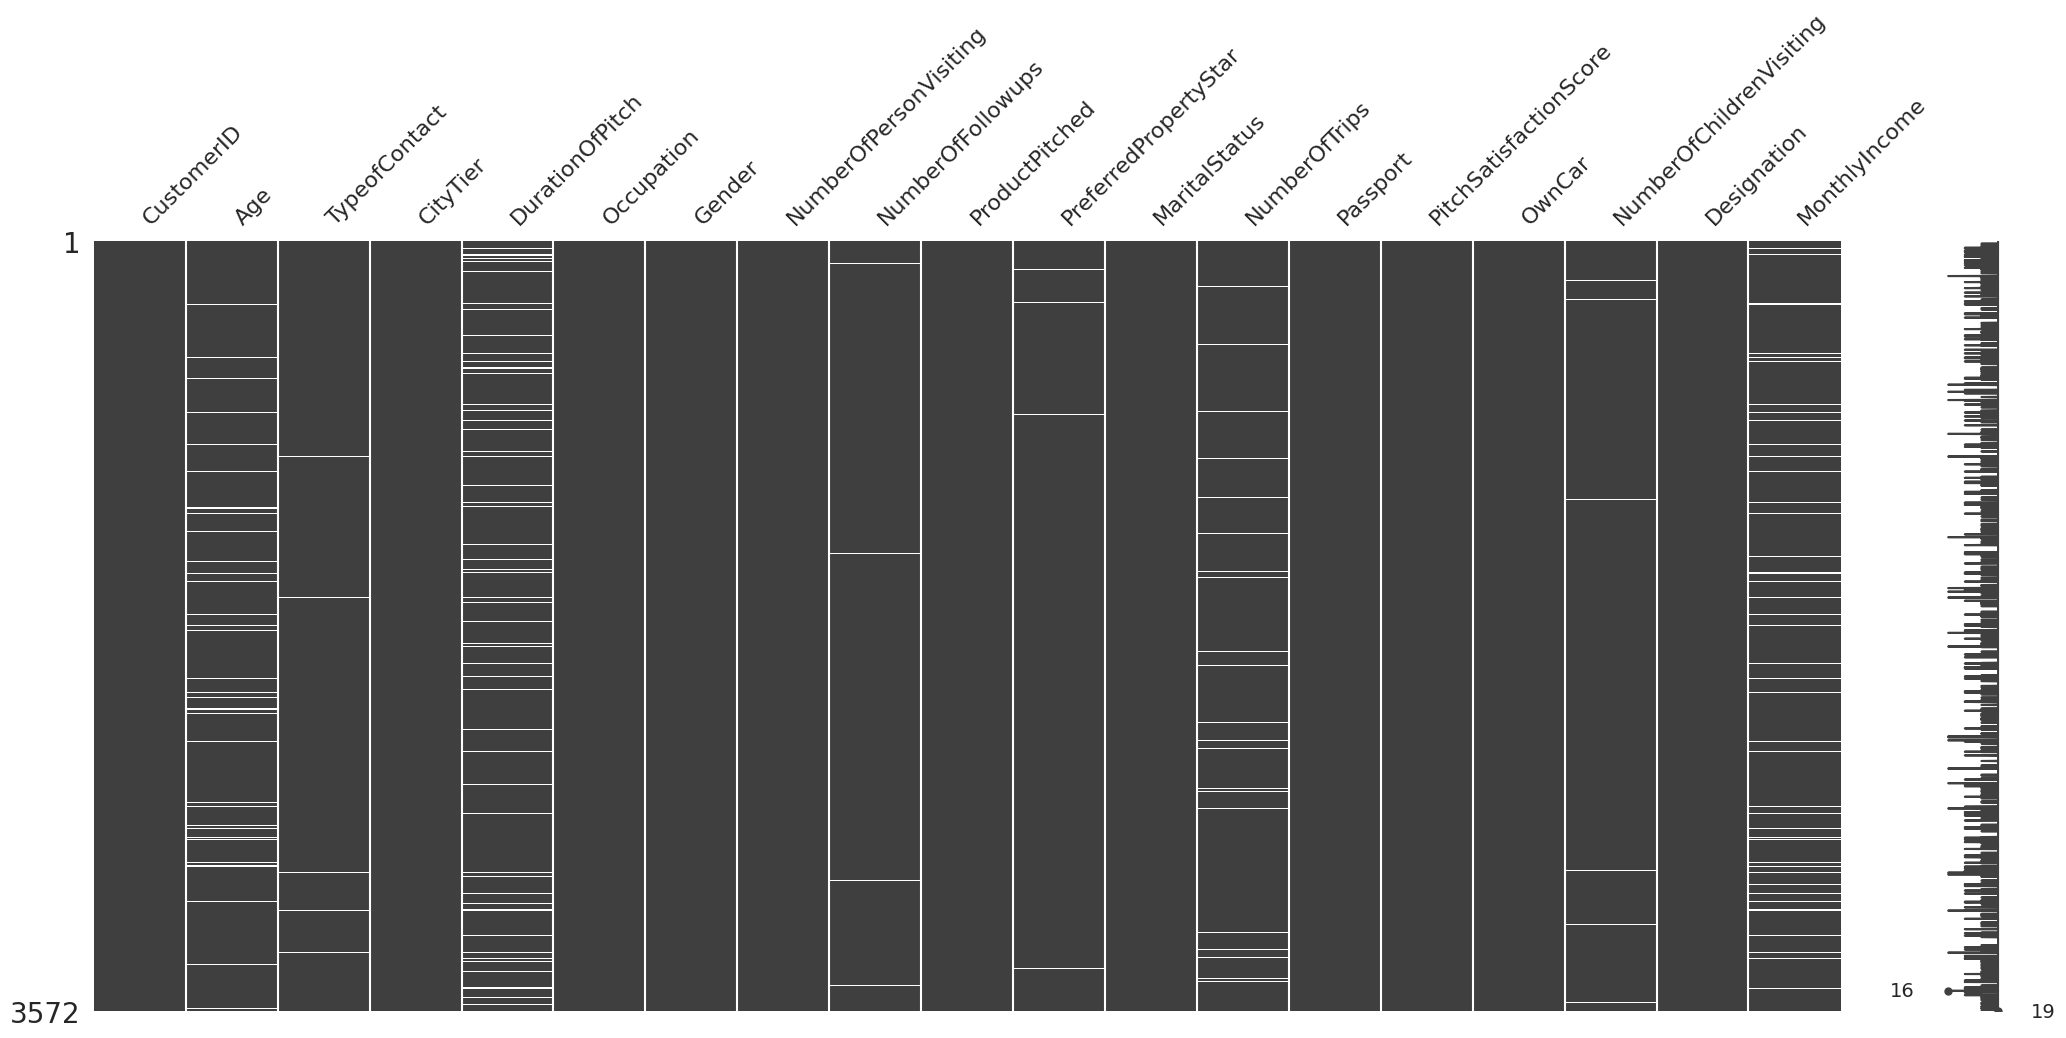

In [77]:
import missingno as msno
# Gives positional information of the missing values
msno.matrix(X_train)

**Observations:**

1. There are 8 columns with null values.
2. Age and MonthlyIncome are usually linked to Designation and since there are no missing values in Designation we can use it as a basis to update the missing values in Age and MonthlyIncome.
3. Since Data is Missing completely at random and comtains low % of missingness w.r.t overall data, so we can impute missing value with Mean or Median respectively.
4. NumberOfChildrenVisiting, NumberOfTrips, PreferredPropertyStar, NumberOfFollowups, DurationOfPitch can be populated with Median values of the column.
5. For TypeofContact we will have to impute values based on available data in the column

### Converting categorical columns in category datatype

In [78]:
def Convert_the_Categorical_columns_to_Category_Datatype(df):

    """Convert the Categorical columns to Category Datatype"""
    try:
        # creating list of category columns that are not object type
        cat_cols = ["CityTier","ProdTaken","NumberOfPersonVisiting","NumberOfChildrenVisiting","PreferredPropertyStar","Passport","PitchSatisfactionScore","OwnCar"]
        df[cat_cols] = df[cat_cols].astype("category")

    except KeyError:
        # creating list of category columns that are not object type
        cat_cols = ["CityTier","NumberOfPersonVisiting","NumberOfChildrenVisiting","PreferredPropertyStar","Passport","PitchSatisfactionScore","OwnCar"]
        df[cat_cols] = df[cat_cols].astype("category")

    finally:
        # selecting all object datatypes and converting to category
        cols = df.select_dtypes(["object"])
        for i in cols.columns:
            df[i] = df[i].astype("category")
        return df

In [79]:
X_train = Convert_the_Categorical_columns_to_Category_Datatype(df=X_train)
X_val = Convert_the_Categorical_columns_to_Category_Datatype(df=X_val)

### Treat Age and MonthlyIncome for missing values

In [80]:
# # replacing the missing values with median income w.r.t the customer"s designation
# X_train["MonthlyIncome"] = X_train.groupby(["Designation"])["MonthlyIncome"].transform(lambda x: x.fillna(x.median()))
# X_train["Age"] = X_train.groupby(["Designation"])["Age"].transform(lambda x: x.fillna(x.median()))

In [81]:
# Saving the missing values generated from MonthlyIncome and age w.r.t Designation , so this can be used in prediction
data_preprocessing_MonthlyIncome_missing_value = X_train.groupby(["Designation"])["MonthlyIncome"].median().to_dict()
data_preprocessing_Age_missing_value = X_train.groupby(["Designation"])["Age"].median().to_dict()


# Function to apply Missing value imputation on Age and MonthlyIncome
def impute(df):
    # print(f"---------{bool(x['Age'])}----------")
    if bool(df['Age']):

        df['Age'] = data_preprocessing_Age_missing_value[df["Designation"]]
    if bool(df['MonthlyIncome']):
        df['MonthlyIncome'] = data_preprocessing_MonthlyIncome_missing_value[df["Designation"]]
        
    return df


# applying missing value imputation (Age, MonthlySalary) on validation set 
X_train = X_train.apply(impute, axis=1)
X_val = X_val.apply(impute, axis=1)

In [82]:
data_preprocessing_MonthlyIncome_missing_value, data_preprocessing_Age_missing_value

({'AVP': 32373.0,
  'Executive': 20679.0,
  'Manager': 22962.5,
  'Senior Manager': 26416.0,
  'VP': 36739.0},
 {'AVP': 49.0,
  'Executive': 32.0,
  'Manager': 36.0,
  'Senior Manager': 38.0,
  'VP': 47.0})

In [83]:
X_train.isna().sum().T

CustomerID                    0
Age                           0
TypeofContact                23
CityTier                      0
DurationOfPitch             192
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            32
ProductPitched                0
PreferredPropertyStar        21
MaritalStatus                 0
NumberOfTrips               102
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     42
Designation                   0
MonthlyIncome                 0
dtype: int64

### Treating other numerical columns for missing values

In [84]:
X_train.select_dtypes(include=np.number).columns.tolist()
# list of numerical columns
missing_numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

# removing Age and MonthlyIncome as we have already treated these columns
missing_numerical_columns.remove("MonthlyIncome")
missing_numerical_columns.remove("Age")
# Saving all median values
missing_numerical_columns_median_values = X_train[missing_numerical_columns].median().to_dict()
missing_numerical_columns_median_values

{'CustomerID': 202446.5,
 'DurationOfPitch': 13.0,
 'NumberOfFollowups': 4.0,
 'NumberOfTrips': 3.0}

In [85]:
def getting_median_values(df)->(pd.DataFrame, dict):
    """Function to get median values to fill missing values"""
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    # removing Age and MonthlyIncome as we have already treated these columns
    numeric_columns.remove("MonthlyIncome")
    numeric_columns.remove("Age")
    median_values = df[numeric_columns].median().to_dict()
    
    return numeric_columns, median_values

In [86]:
missing_numerical_columns, missing_numerical_columns_median_values = getting_median_values(df=X_train)

In [87]:
# missing value impute
# X_train[missing_numerical_columns] = df[missing_numerical_columns].apply(lambda x:x.fillna(x.median()),axis=0)

In [88]:
# # Function to apply Missing value in other numerical columns with its medians
# def impute_median(x):
#     print(x.columns)
#     # print(type(x.name))
#     # col_name = x.name
#     # if x.name in missing_numerical_columns:
        
#         # if bool(x[col_name]):
#         #     x[col_name] = missing_numerical_columns_median_values[col_name]
    
#     return x
    

In [89]:
# for i in missing_numerical_columns:
#     print(i)
#     X_val[i] = X_val[[i]].apply(lambda x:x.fillna(missing_numerical_columns_median_values[i]))

In [90]:
# Function to apply Missing value in other numerical columns with its medians
def impute_median(df:pd.DataFrame,
                    missing_columns_median_values:missing_numerical_columns_median_values,
                        missing_numeric_columns:missing_numerical_columns):
    for i in missing_numeric_columns:
        df[i] = df[[i]].apply(lambda x:x.fillna(missing_columns_median_values[i]))
    
    return df
    

In [91]:
X_train = impute_median(df=X_train, 
                missing_columns_median_values=missing_numerical_columns_median_values, 
                    missing_numeric_columns=missing_numerical_columns)

X_val = impute_median(df=X_val, 
                missing_columns_median_values=missing_numerical_columns_median_values, 
                    missing_numeric_columns=missing_numerical_columns)

In [92]:
X_train.isna().sum()

CustomerID                   0
Age                          0
TypeofContact               23
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

In [93]:
X_val.isna().sum()

CustomerID                  0
Age                         0
TypeofContact               1
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [94]:
X_train.Gender.unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [95]:
# This is also to be do for correction in gender

# a = df.copy(deep=True)
# a.Gender = a.Gender.replace("Fe Male","Female")
# a["Gender"].unique()

In [96]:
def categorical_encoding(df):
    code = {'Self Enquiry':0,
            'Company Invited':1,
            'Salaried':0,
            'Free Lancer':1,
            'Small Business':2,
            'Large Business':3,
            'Female':0,
            'Male':1,
            'Deluxe':0,
            'Basic':1,
            'Standard':2,
            'SuperDeluxe':3,
            'King':4,
            'Single':0,
            'Divorced':1,
            'Married':2,
            'Unmarried':3,
            'Manager':0,
            'Executive':1,
            'Senior Manager':2,
            'AVP':3,
            'VP':4
           }
    
    